# Capacity Factor
---

In [1]:
import sys
sys.path.append("../")
sys.path.append("../../process")

import warnings
warnings.simplefilter("ignore")

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import transferdata as td
from analyze_pg import AnalyzePG as apg
from westernintnet.westernintnet import win_data

Loading sub
Loading bus2sub
Loading bus
Loading genbus
Loading branches
Loading resources
Loading net_generation
Done loading


In [3]:
od = td.OutputData()

Use  C:\Users\brdo\scenario_data\  to save/load local scenario data.


In [4]:
def get_plant_id(zone, resource):
    plant_id = []
    if zone == 'Western':
        try:
            plant_id = win_data.genbus.groupby('type').get_group(resource).index.values.tolist()
        except KeyError:
            pass
    elif zone == 'California':
        CA = ['Bay Area', 'Central California', 'Northern California',
              'Southeast California', 'Southwest California']
        for load_zone in CA:
            try:
                plant_id += win_data.genbus.groupby(['ZoneName', 'type']).get_group(
                    (load_zone, resource)).index.values.tolist()
            except KeyError:
                pass
    else:
        try:
            plant_id = win_data.genbus.groupby(['ZoneName', 'type']).get_group(
                (zone, resource)).index.values.tolist()
        except KeyError:
            pass
    
    return plant_id

In [5]:
demand = {'western_scenario_Update01': 'v3',
          'california2020Test01': 'cal2020',
          'california2020_fixCalCong': 'cal2020',
          'california2030Test01': 'cal2030',
          'california2030_fixCalCong': 'cal2030',
          'california2020_westTarget': 'cal2020',
          'california2030_westTarget': 'cal2030'}

factor = {'western_scenario_Update01': {'zone': 'Western', 'solar': 1, 'wind': 1},
          'california2020Test01': {'zone': 'California', 'solar': 1.52, 'wind': 1.48},
          'california2020_fixCalCong': {'zone': 'California', 'solar': 1.52, 'wind': 1.48},
          'california2030Test01': {'zone': 'Western', 'solar': 2.3, 'wind': 2.3},
          'california2030_fixCalCong': {'zone': 'Western', 'solar': 2.3, 'wind': 2.3},
          'california2020_westTarget': {'zone': 'Western', 'solar': 2.25, 'wind': 2.25},
          'california2030_westTarget': {'zone': 'Western', 'solar': 5, 'wind': 5}}

def prepare_data(scenario):
    # renewable profiles
    win_data.read_solar_data('sam')
    win_data.read_wind_data()
    
    # demand
    win_data.read_demand_data(demand[scenario])

    # generation
    pg = od.get_data(scenario, 'PG')
        
    # multipliers
    multiplier = pd.DataFrame({'multiplier': [1]*len(win_data.genbus)}, index=win_data.genbus.index.values)
    for resource in ['solar', 'wind']:
        plant_id = get_plant_id(factor[scenario]['zone'], resource)
        multiplier.loc[plant_id] = factor[scenario][resource]

    return (pg, win_data, multiplier)

In [6]:
def do_yield_analysis(data, time, zones):
    resources = ['solar', 'wind']
    cf = apg(data, time, zones, resources, 'yield', normalize=False)
    cf.get_plot(save=False)
    data_cf = cf.get_data()
    print('----------------------------------------')
    for z in zones:
        print("Capacity factor in %s: " % z)
        for r in resources:
            if data_cf[z][r] is not None:
                print("%s: %.3f (pre-simulation) / %.3f (post-simulation)" % (r, data_cf[z][r][0], data_cf[z][r][1]))
        print('----------------------------------------')

## Scenario

In [7]:
scenario = "california2020_westTarget"

## Annual

Load solar data
Load wind data
Load demand data
No solar plants in Montana
No solar plants in Wyoming


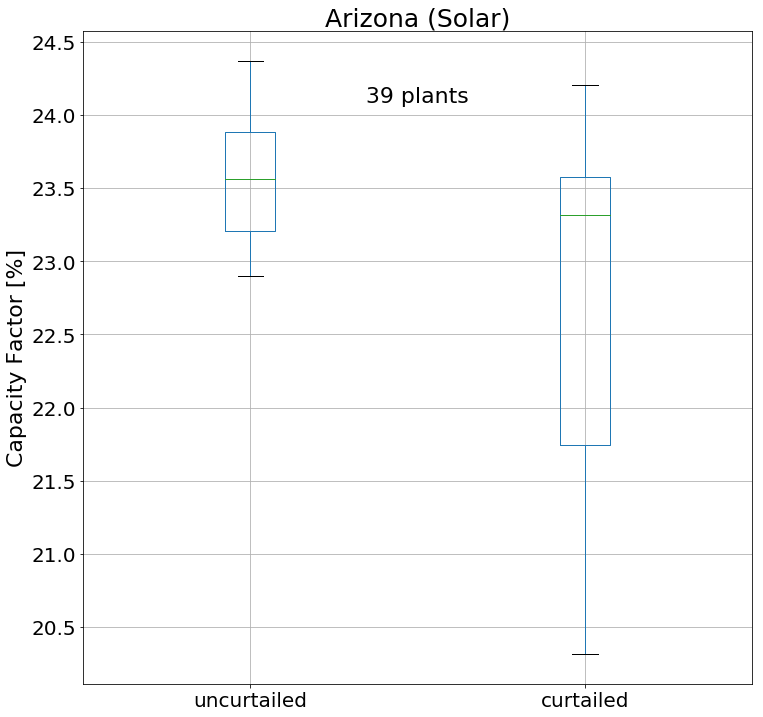

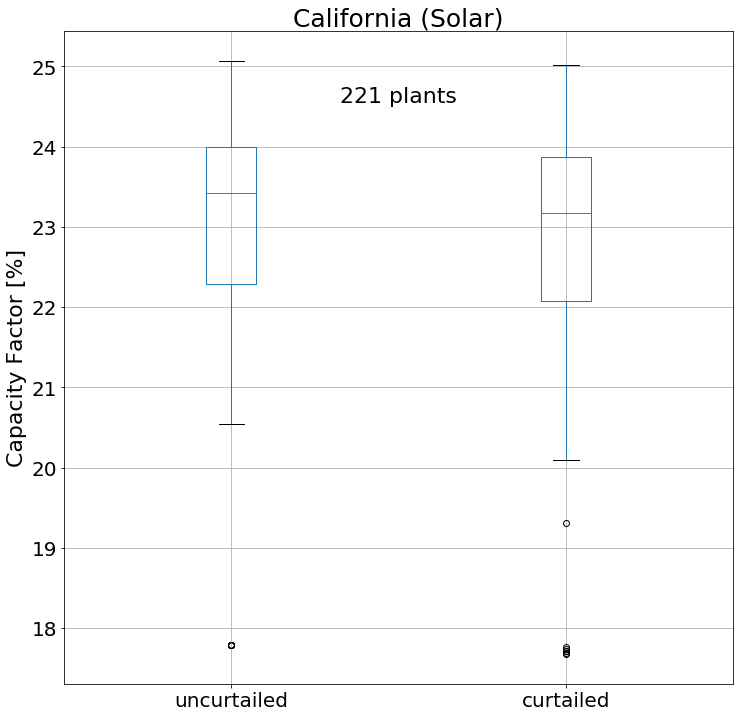

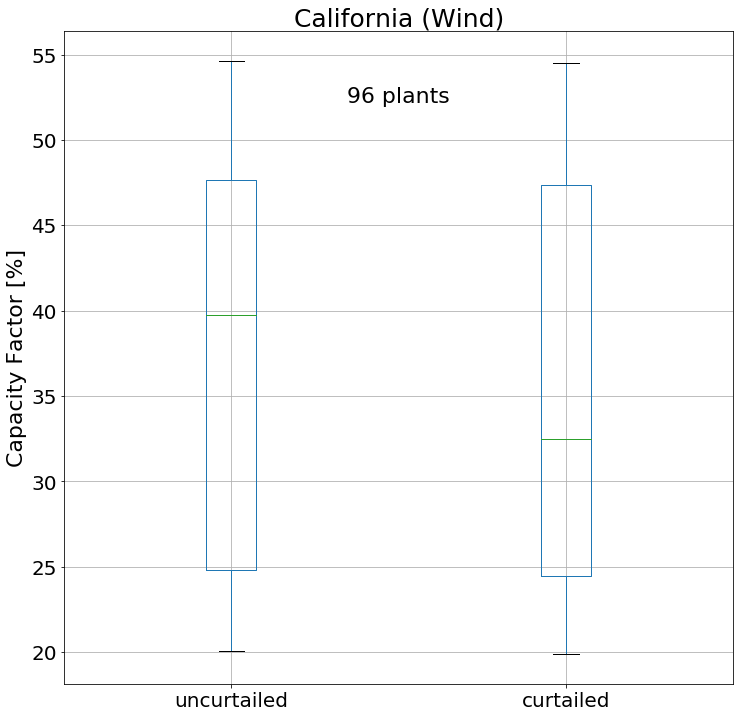

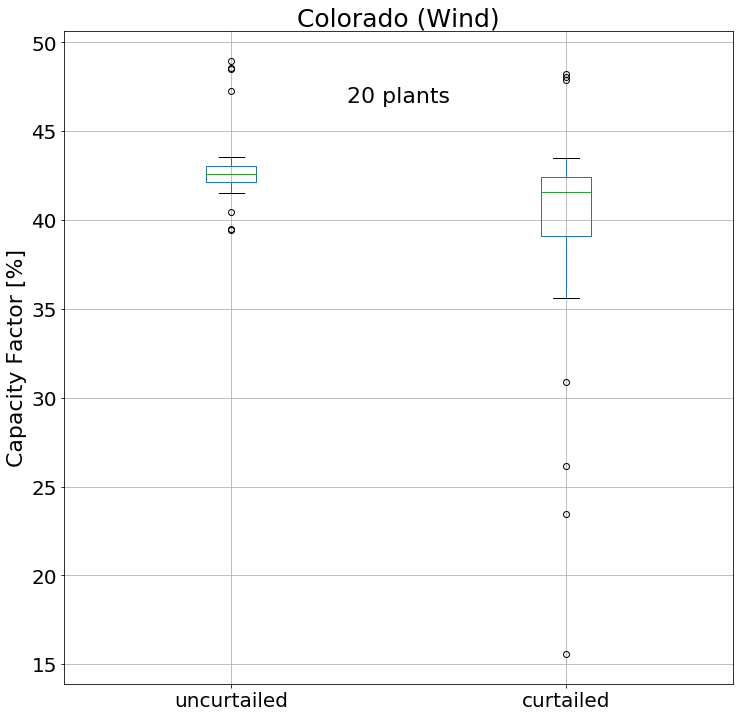

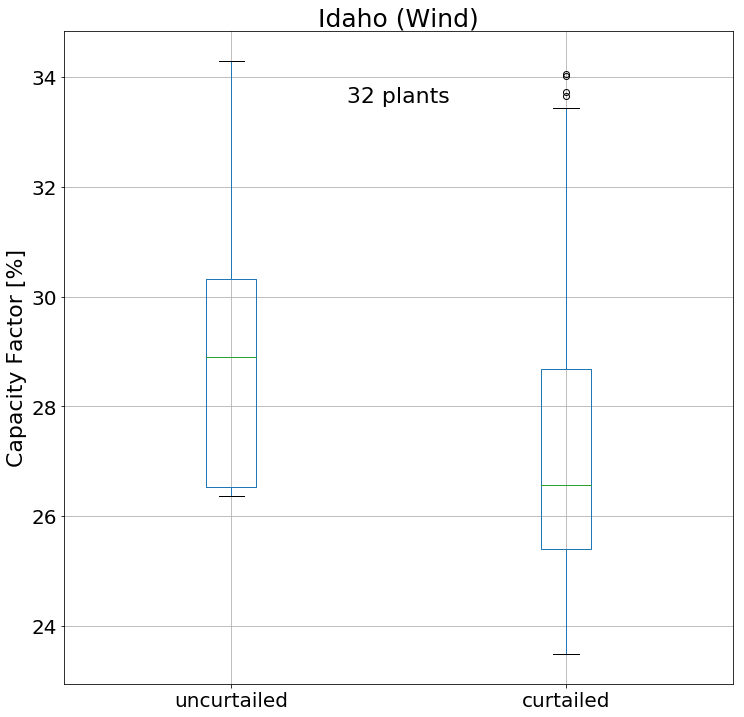

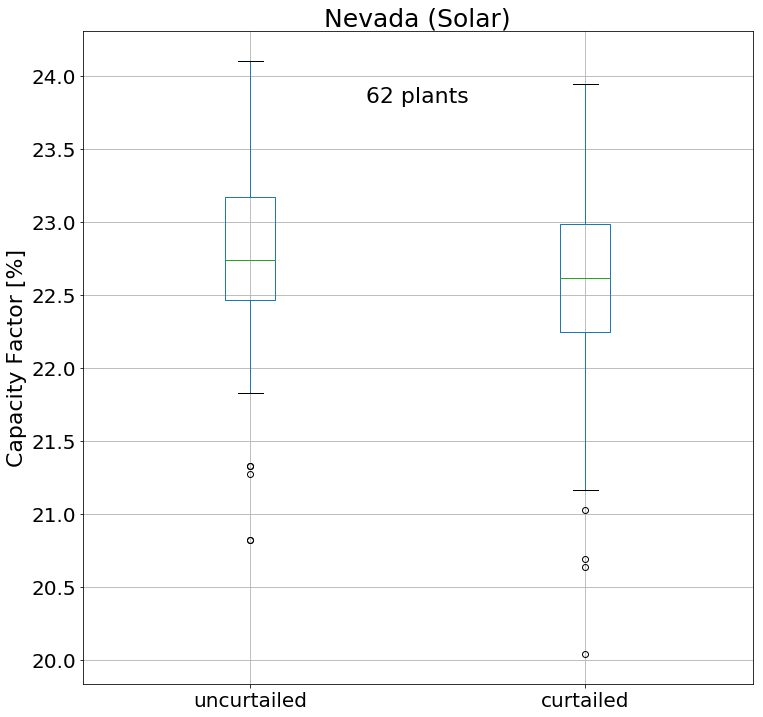

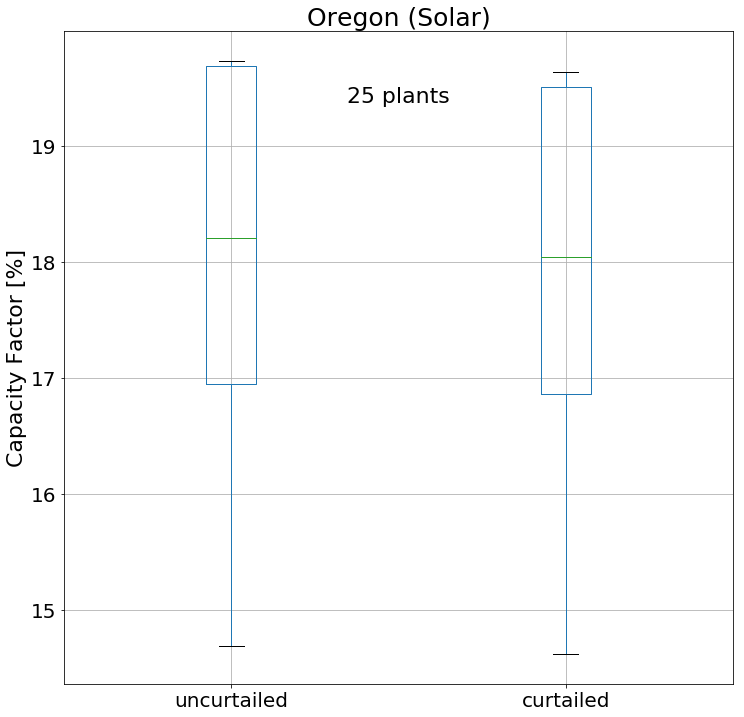

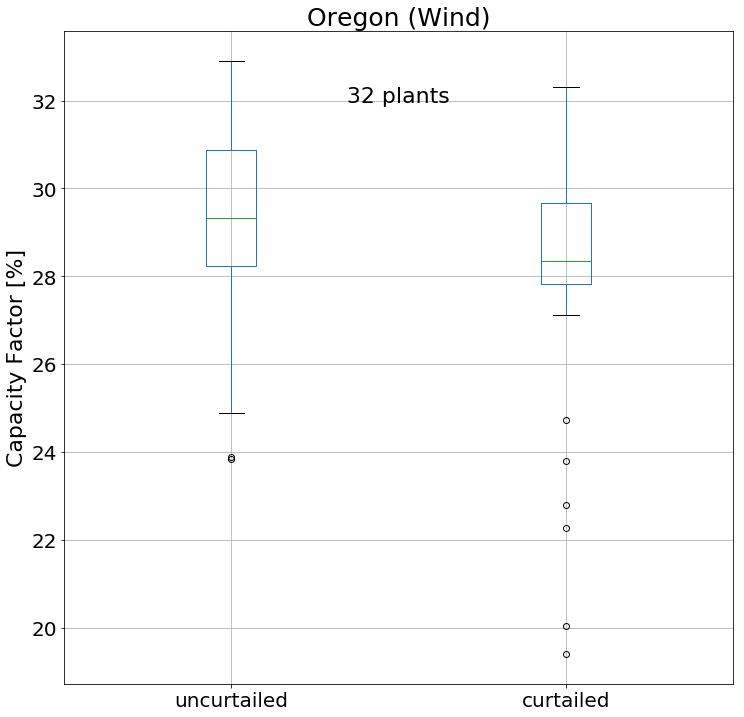

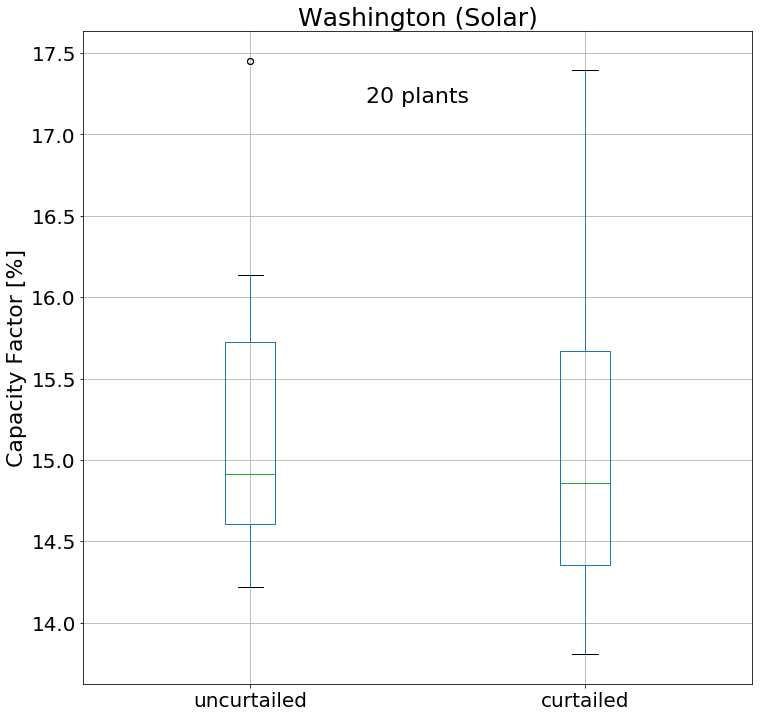

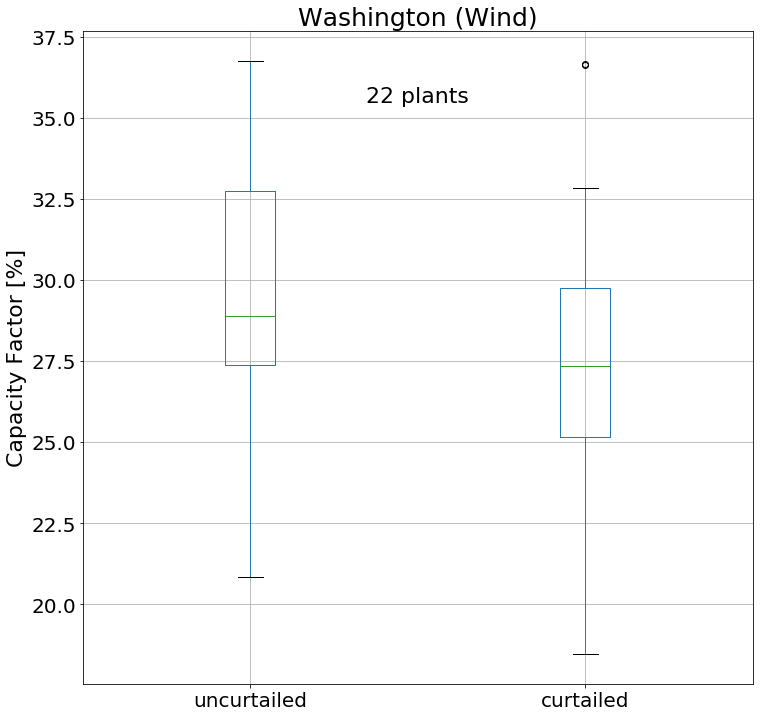

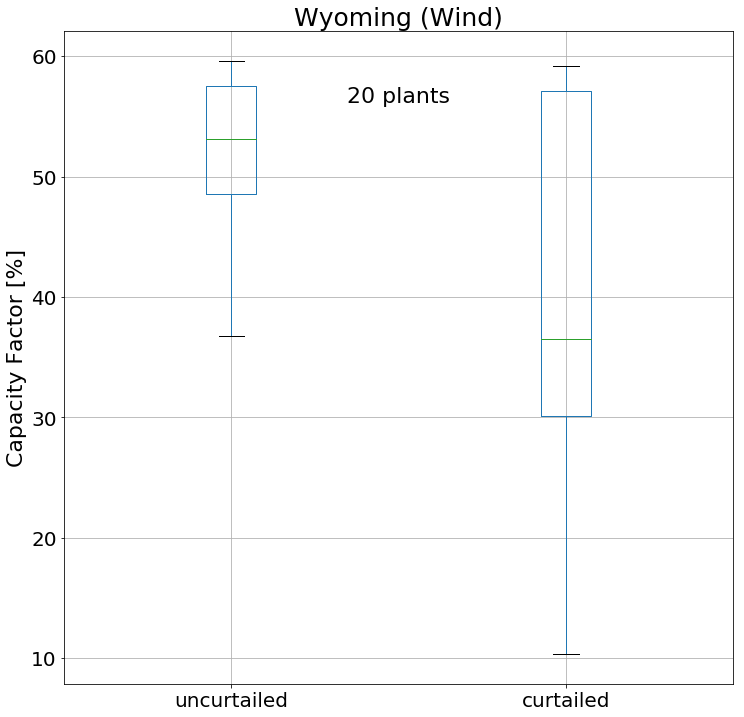

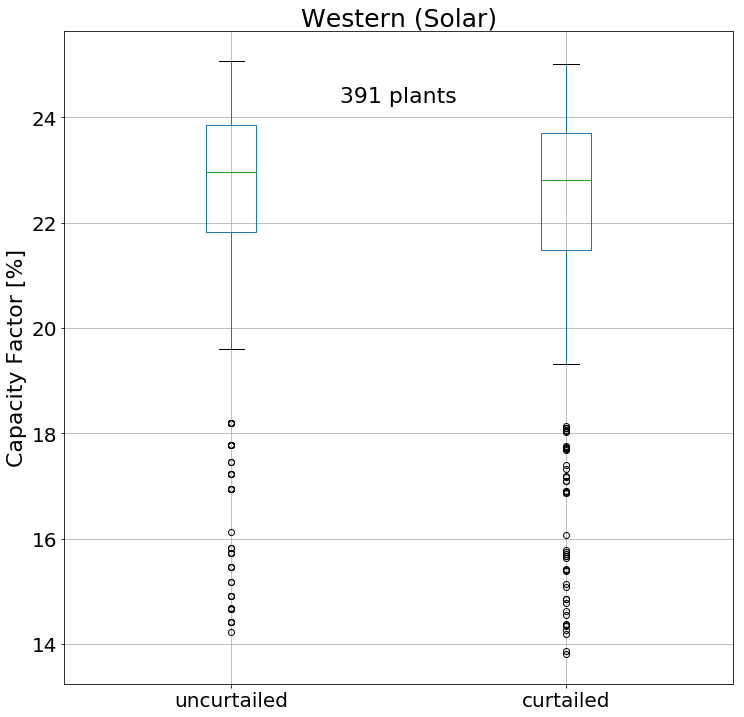

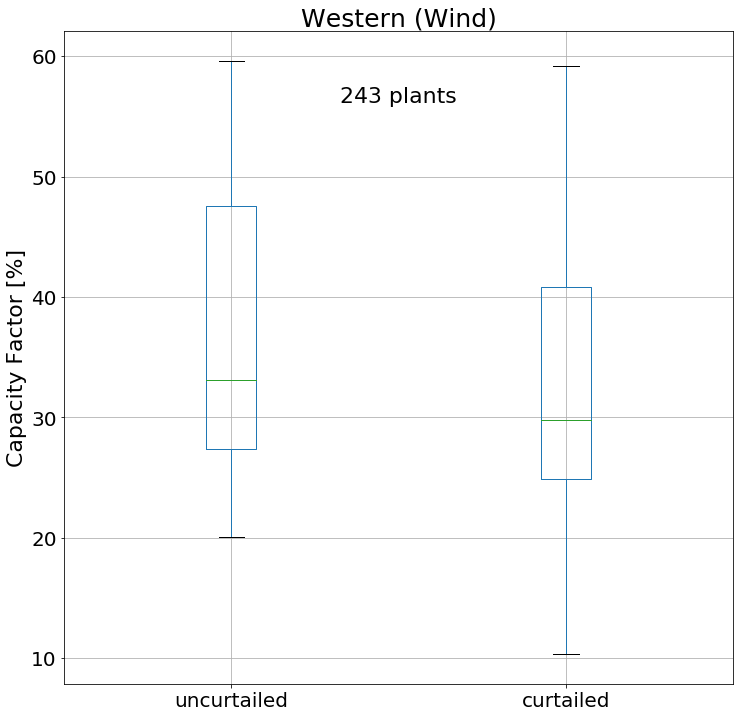

----------------------------------------
Capacity factor in Arizona: 
solar: 0.236 (pre-simulation) / 0.228 (post-simulation)
wind: 0.315 (pre-simulation) / 0.313 (post-simulation)
----------------------------------------
Capacity factor in California: 
solar: 0.231 (pre-simulation) / 0.229 (post-simulation)
wind: 0.371 (pre-simulation) / 0.349 (post-simulation)
----------------------------------------
Capacity factor in Colorado: 
solar: 0.229 (pre-simulation) / 0.228 (post-simulation)
wind: 0.433 (pre-simulation) / 0.388 (post-simulation)
----------------------------------------
Capacity factor in Idaho: 
solar: 0.180 (pre-simulation) / 0.179 (post-simulation)
wind: 0.291 (pre-simulation) / 0.277 (post-simulation)
----------------------------------------
Capacity factor in Montana: 
wind: 0.391 (pre-simulation) / 0.344 (post-simulation)
----------------------------------------
Capacity factor in Nevada: 
solar: 0.227 (pre-simulation) / 0.225 (post-simulation)
wind: 0.403 (pre-simulat

In [8]:
time = ('2016-01-01-00', '2016-12-31-23', 'utc', 'H')
data = prepare_data(scenario)
zones = ['Arizona', 'California', 'Colorado', 'Idaho', 'Montana', 'Nevada',
         'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming', 'Western']
do_yield_analysis(data, time, zones)

## Winter

Load solar data
Load wind data
Load demand data
No solar plants in Montana
No solar plants in Wyoming


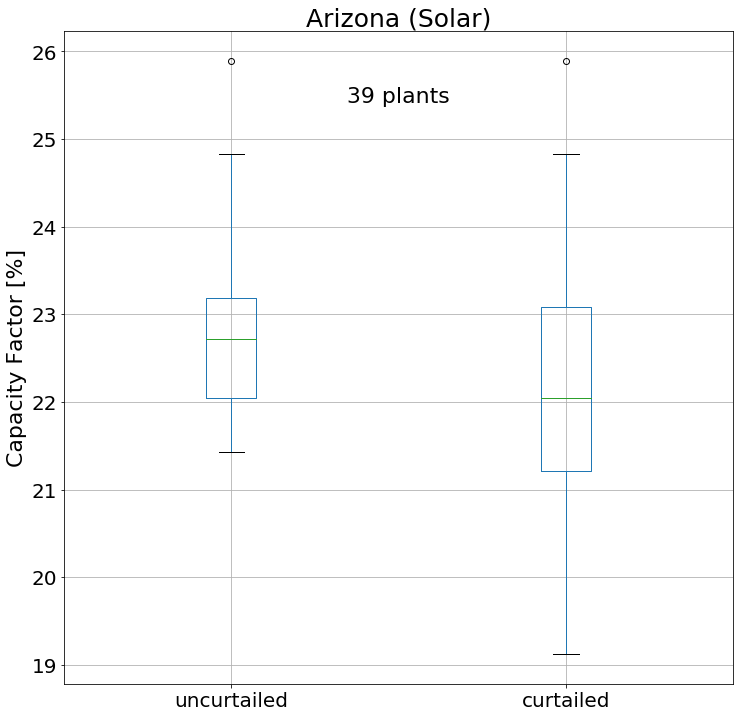

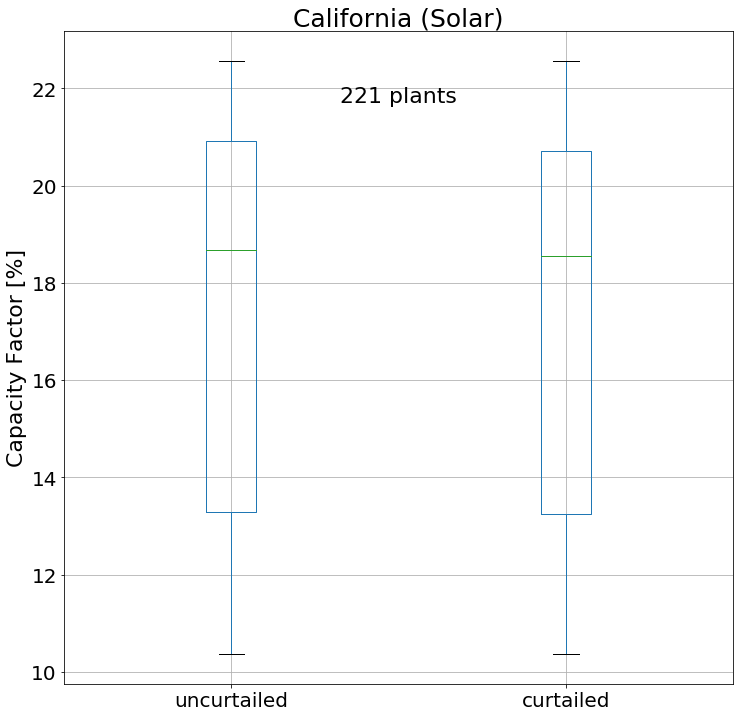

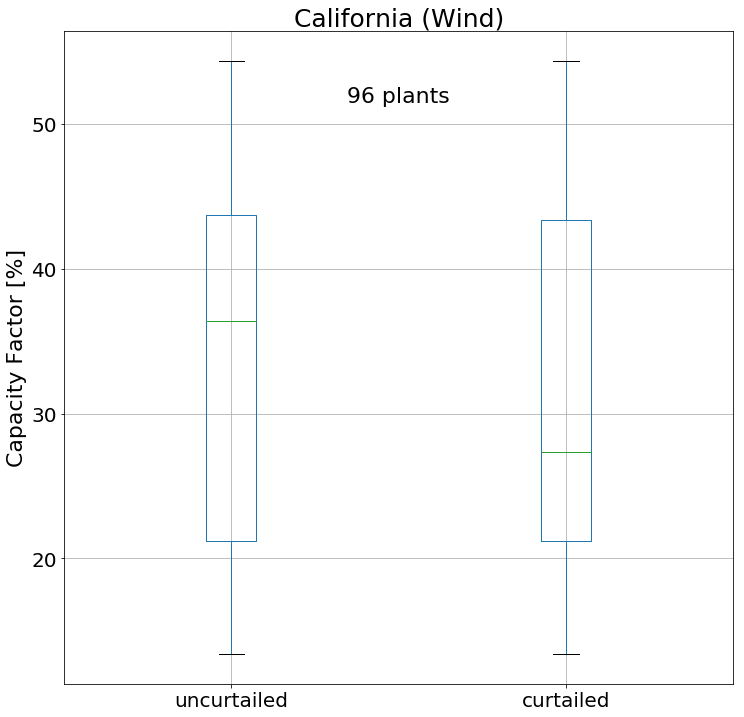

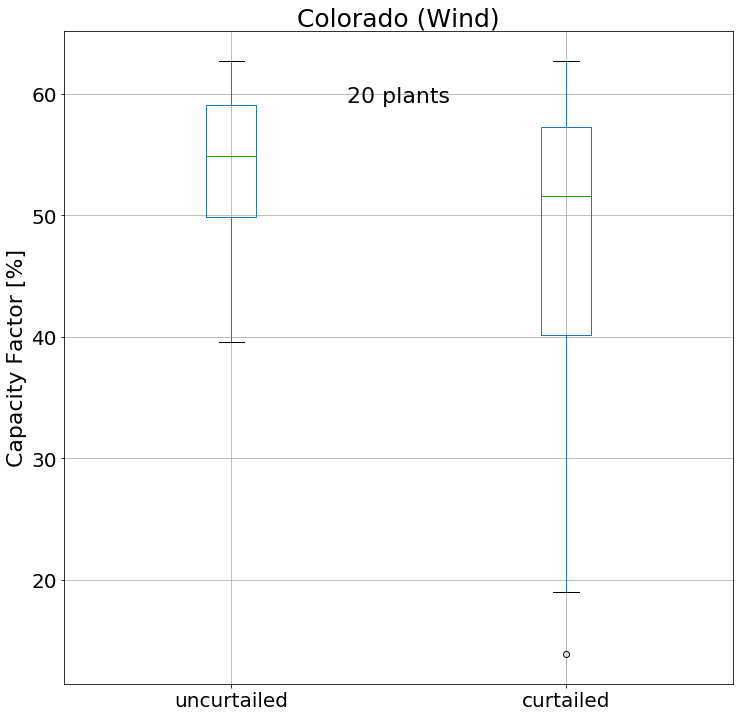

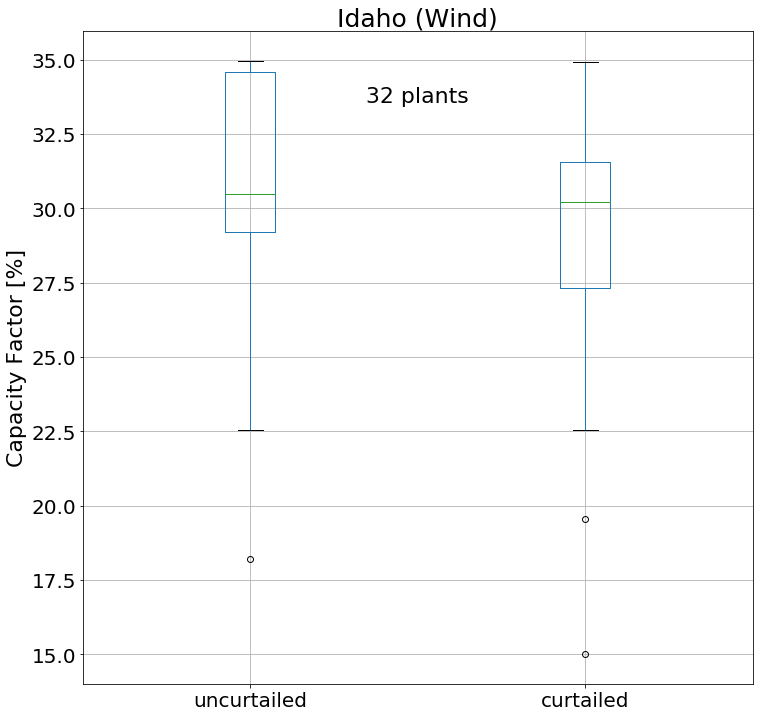

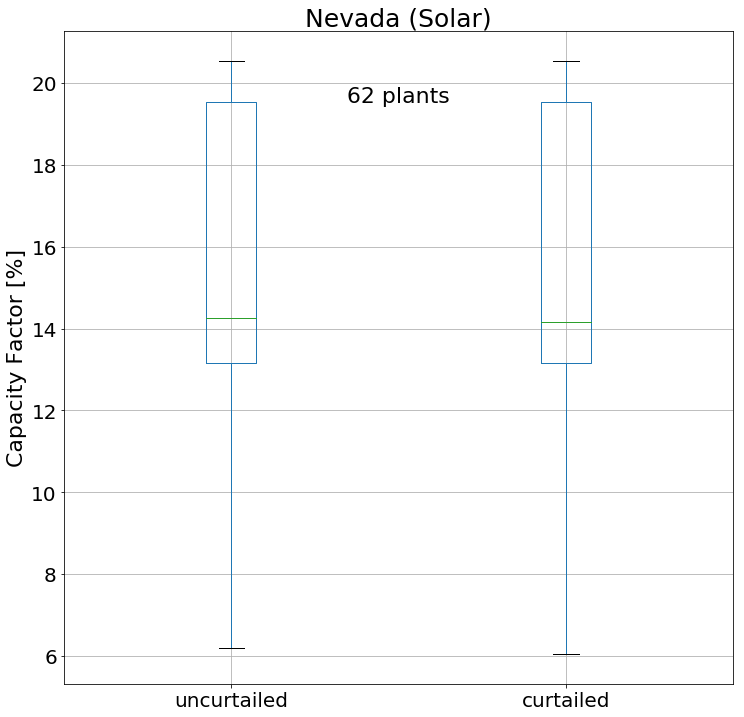

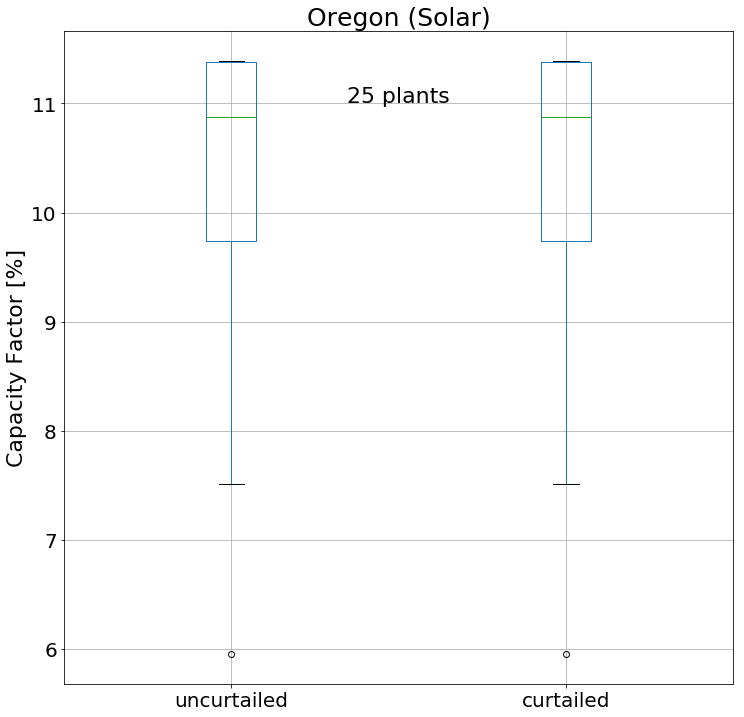

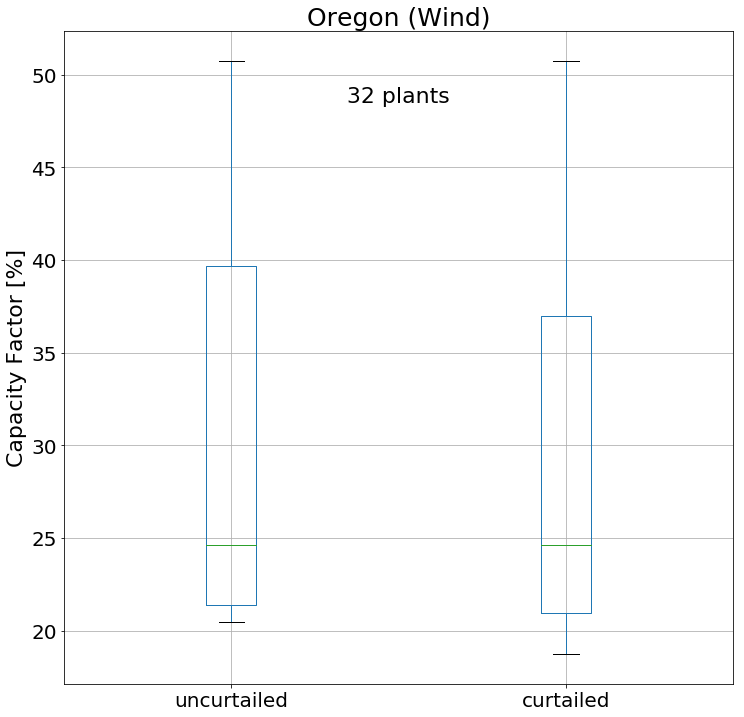

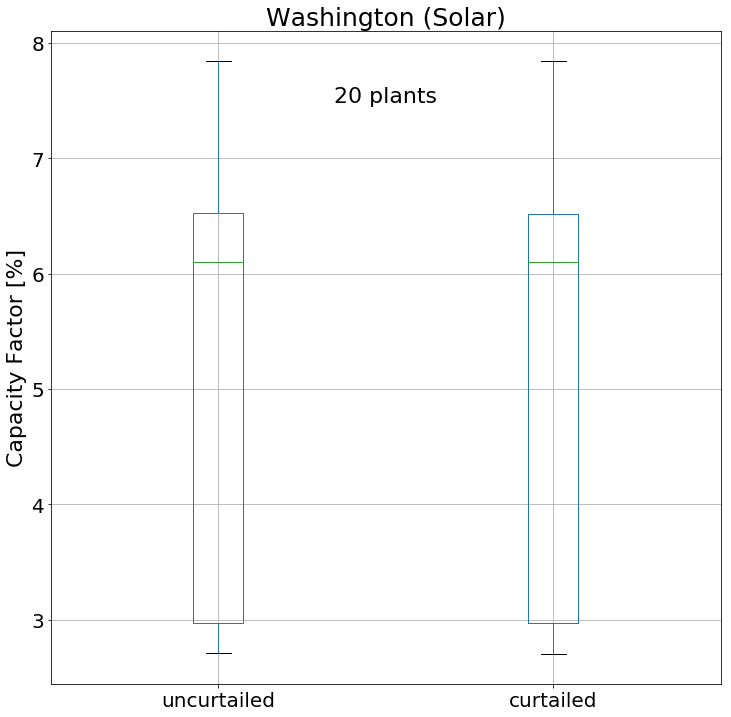

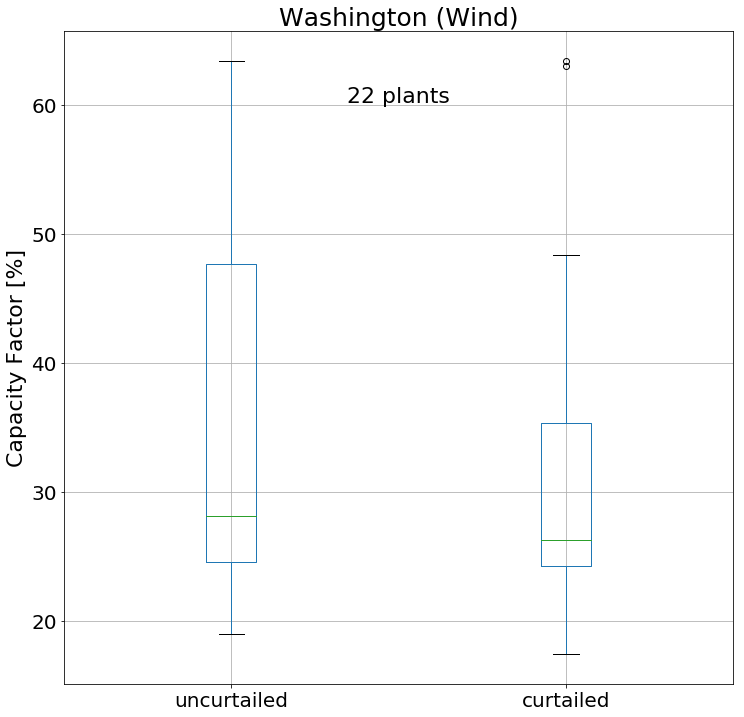

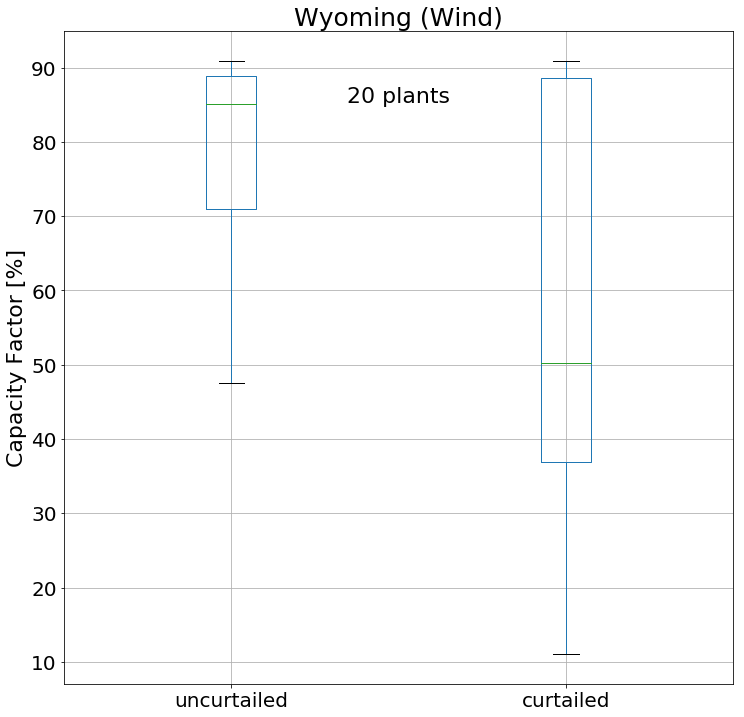

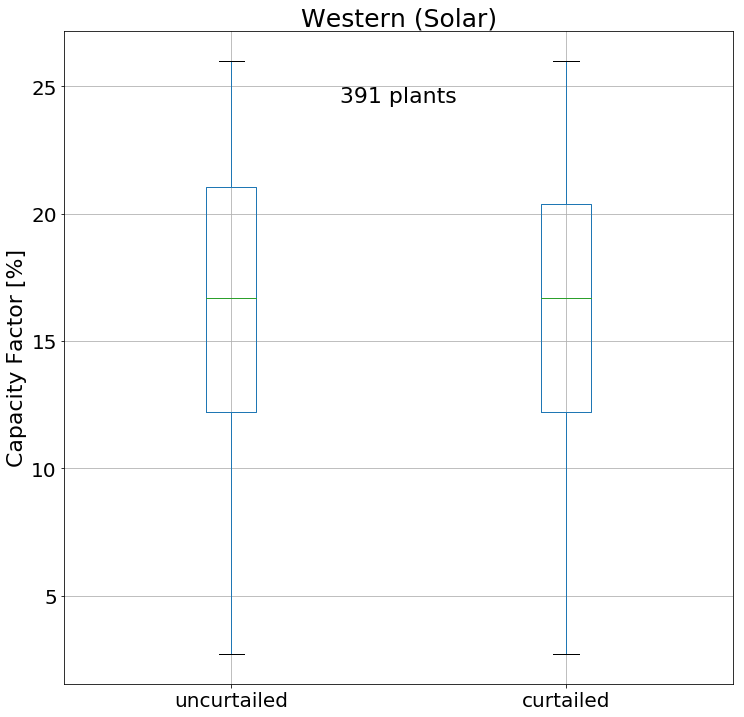

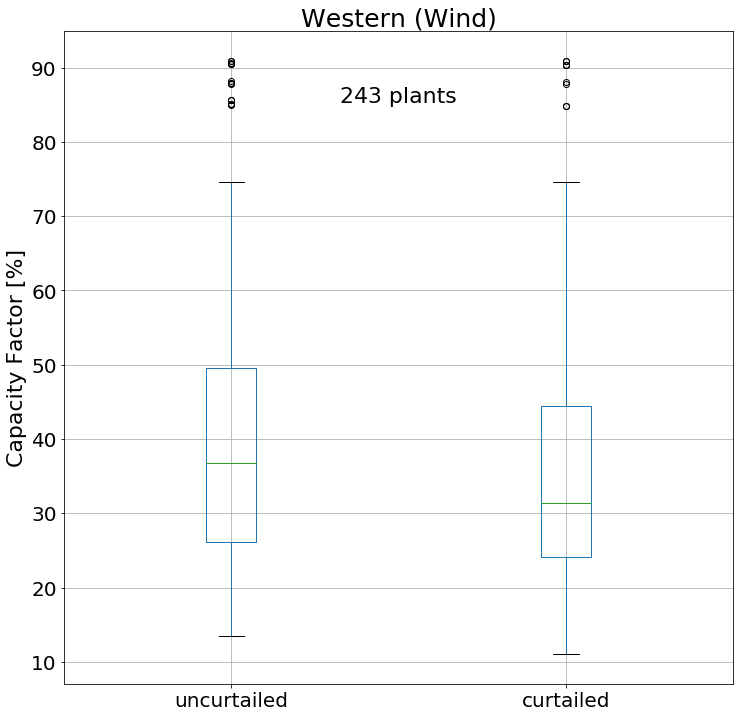

----------------------------------------
Capacity factor in Arizona: 
solar: 0.228 (pre-simulation) / 0.221 (post-simulation)
wind: 0.359 (pre-simulation) / 0.358 (post-simulation)
----------------------------------------
Capacity factor in California: 
solar: 0.172 (pre-simulation) / 0.171 (post-simulation)
wind: 0.340 (pre-simulation) / 0.318 (post-simulation)
----------------------------------------
Capacity factor in Colorado: 
solar: 0.141 (pre-simulation) / 0.141 (post-simulation)
wind: 0.531 (pre-simulation) / 0.470 (post-simulation)
----------------------------------------
Capacity factor in Idaho: 
solar: 0.087 (pre-simulation) / 0.087 (post-simulation)
wind: 0.301 (pre-simulation) / 0.292 (post-simulation)
----------------------------------------
Capacity factor in Montana: 
wind: 0.708 (pre-simulation) / 0.593 (post-simulation)
----------------------------------------
Capacity factor in Nevada: 
solar: 0.149 (pre-simulation) / 0.149 (post-simulation)
wind: 0.405 (pre-simulat

In [9]:
time = ('2016-01-21-00', '2016-01-31-23', 'utc', 'H')
data = prepare_data(scenario)
zones = ['Arizona', 'California', 'Colorado', 'Idaho', 'Montana', 'Nevada',
         'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming', 'Western']
do_yield_analysis(data, time, zones)

## Spring

Load solar data
Load wind data
Load demand data
No solar plants in Montana
No solar plants in Wyoming


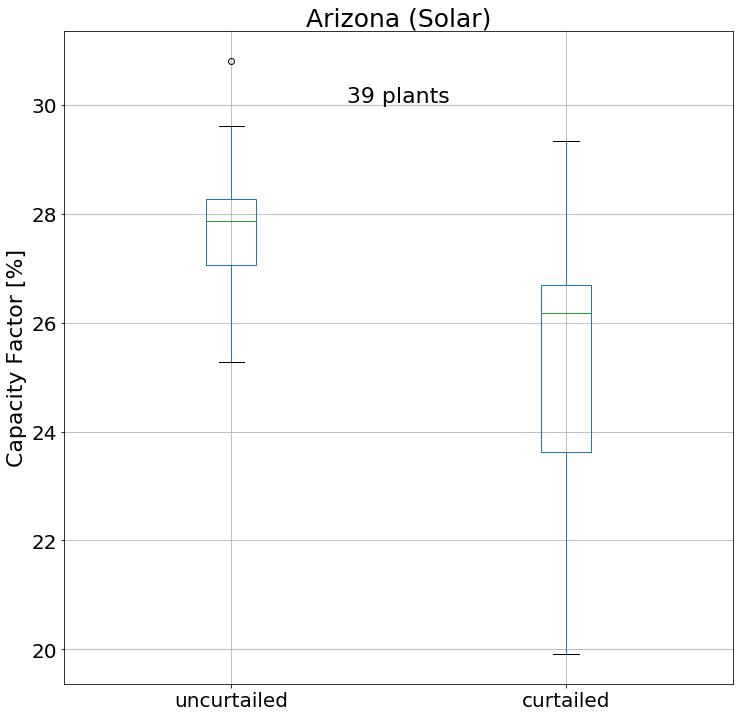

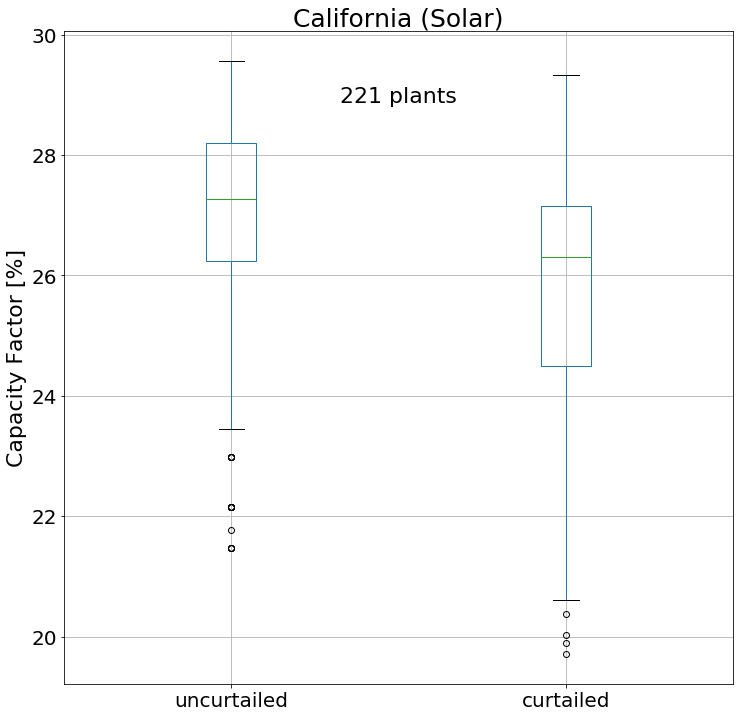

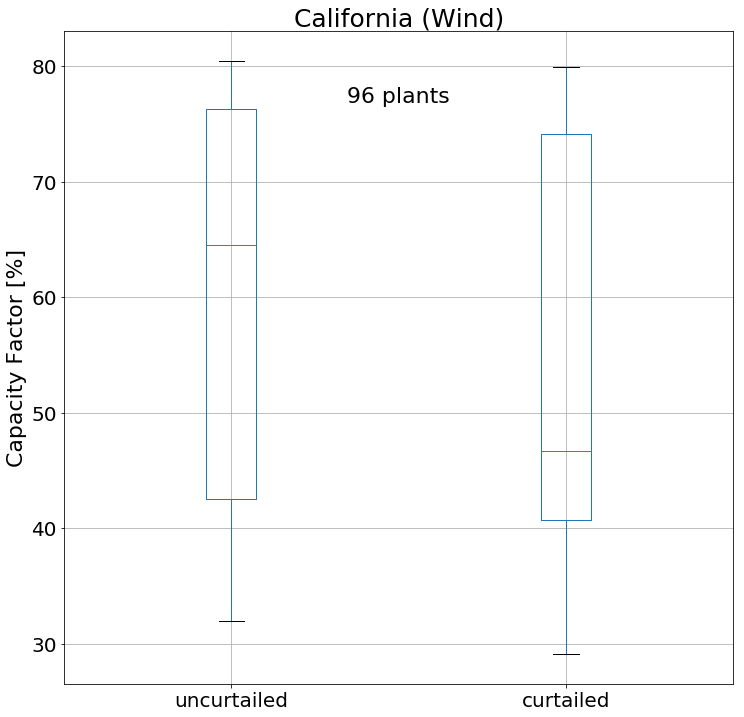

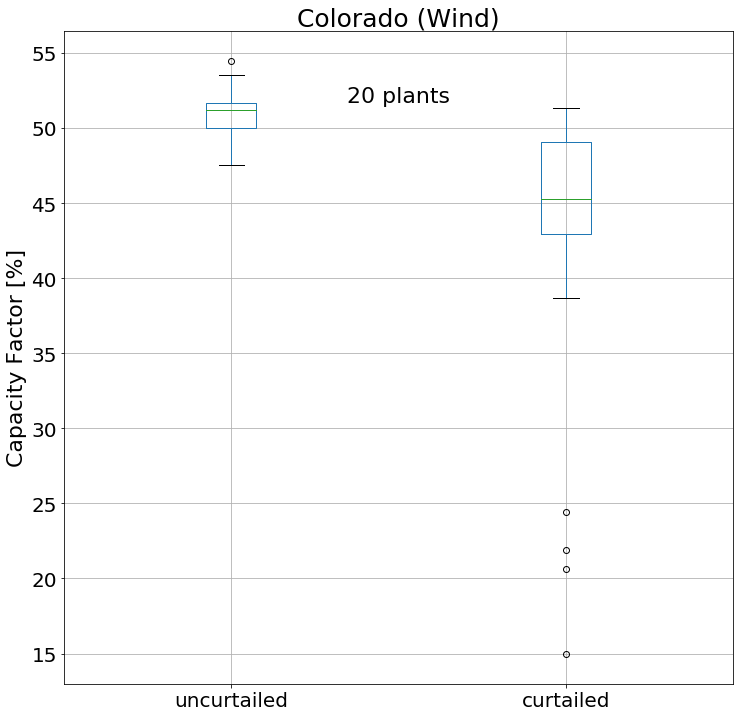

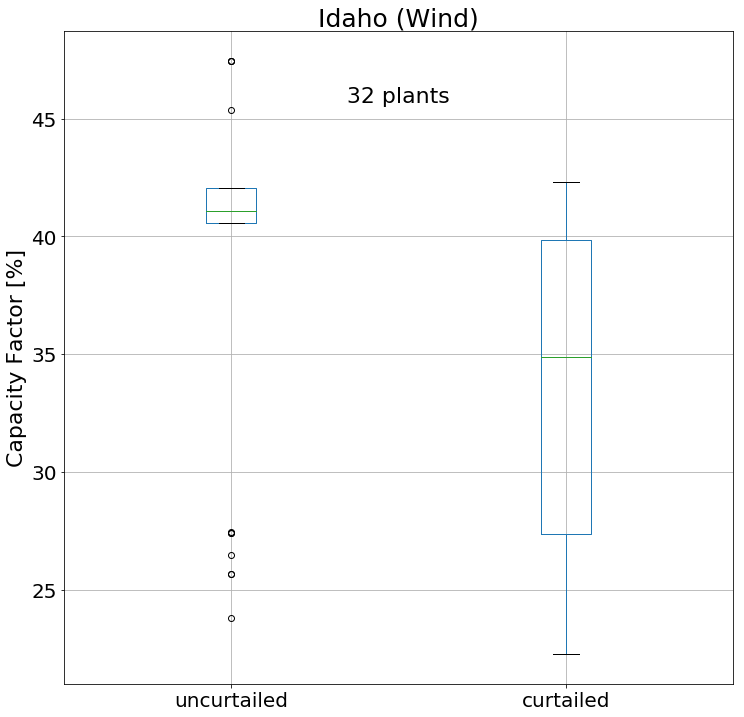

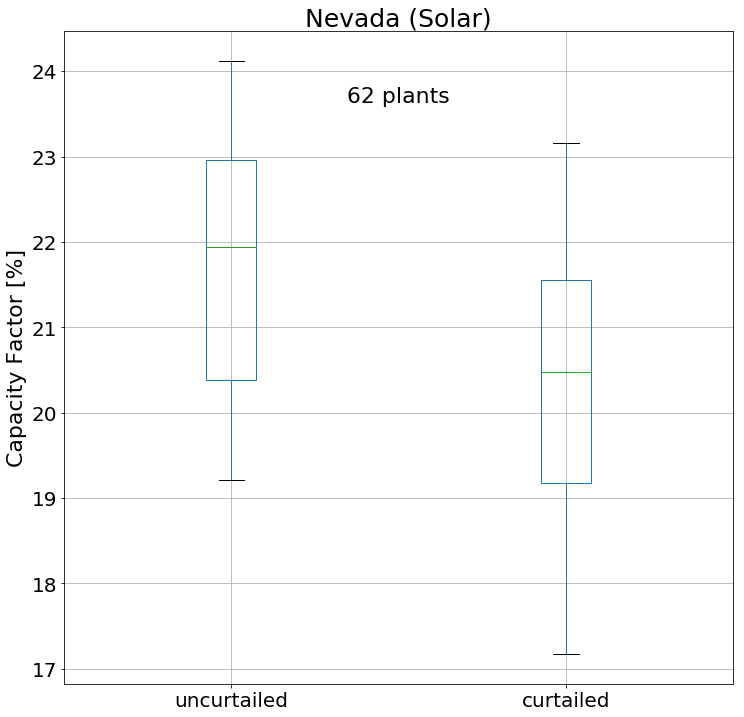

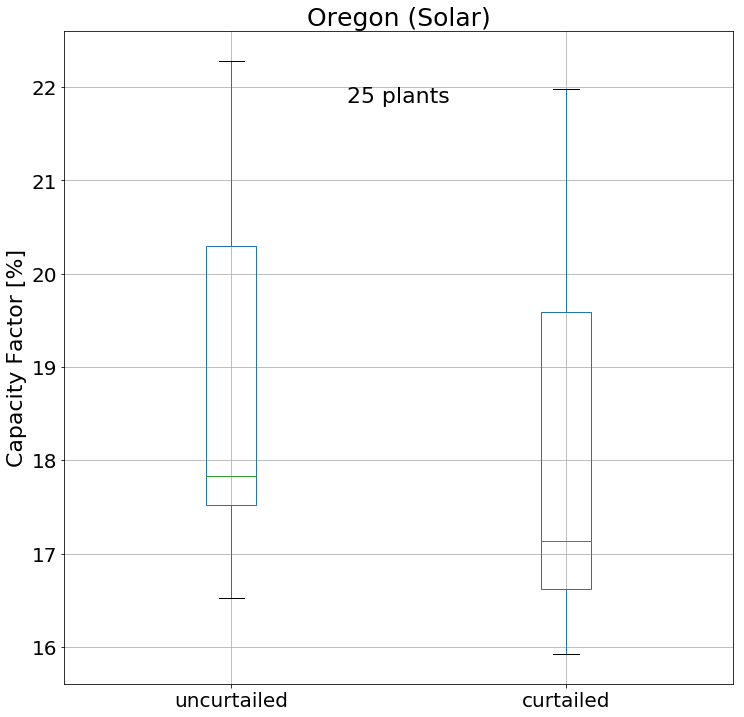

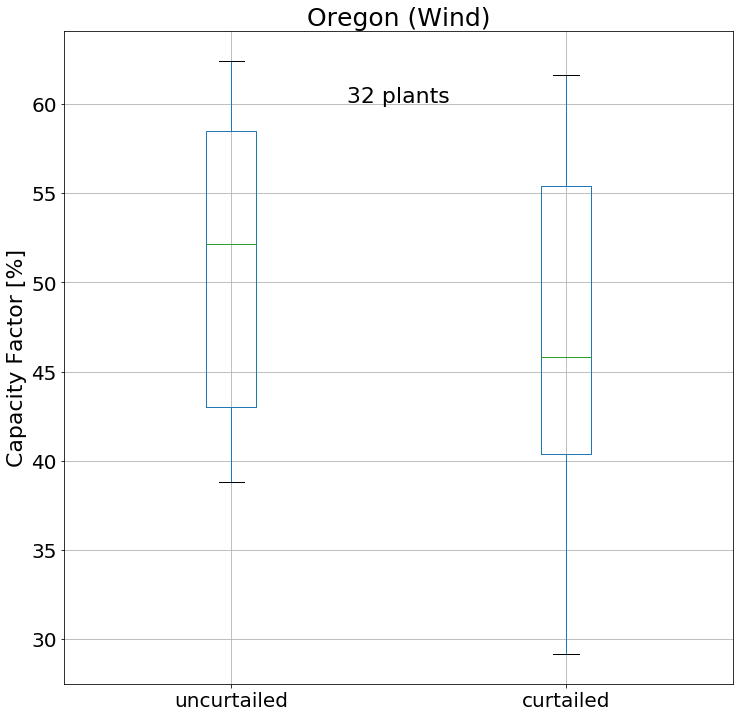

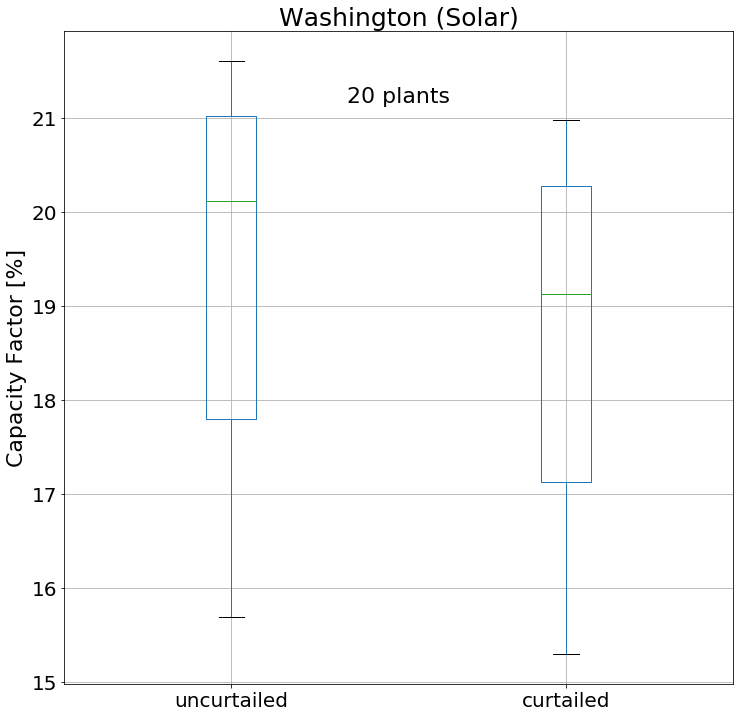

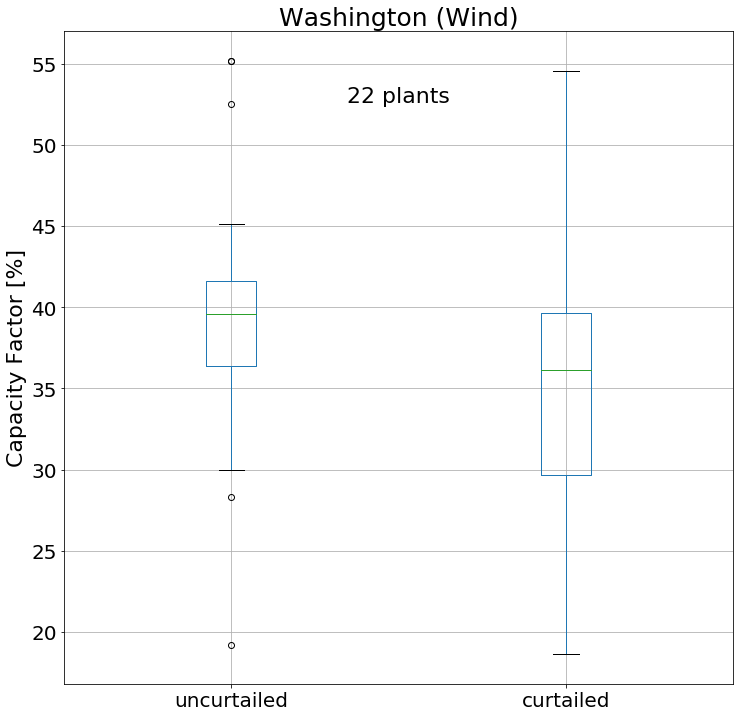

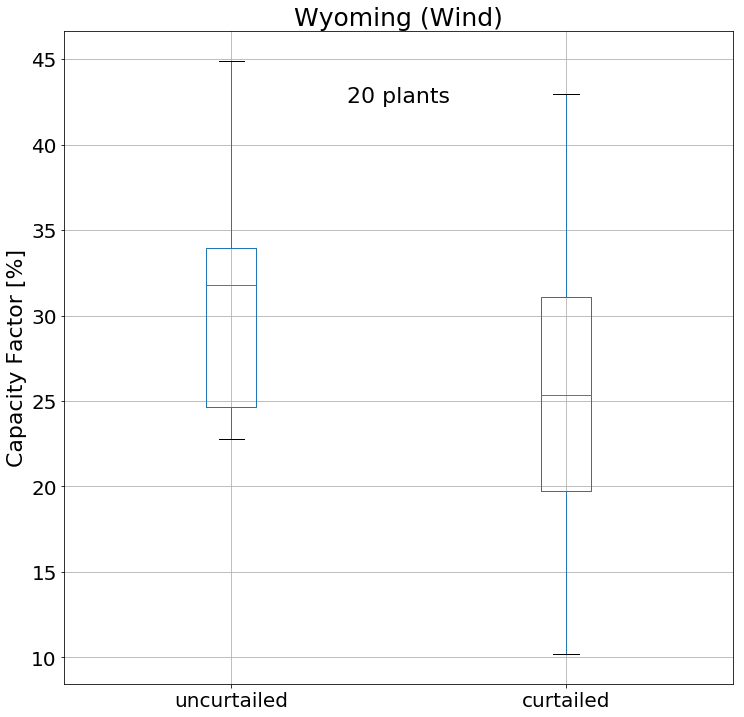

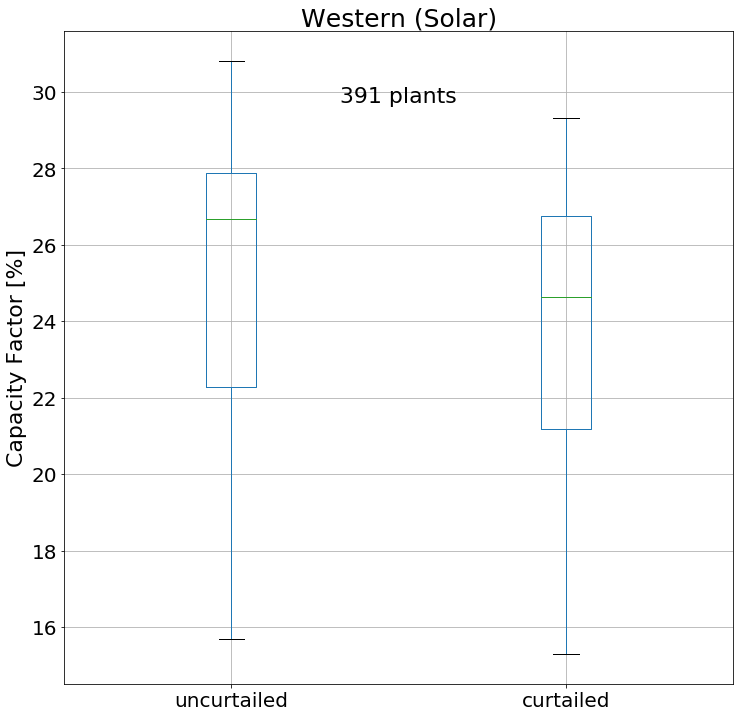

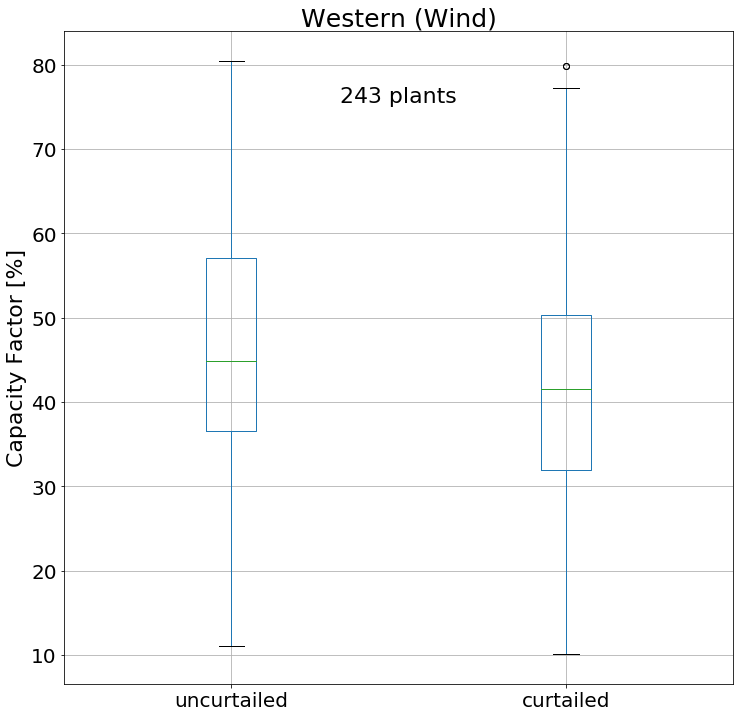

----------------------------------------
Capacity factor in Arizona: 
solar: 0.278 (pre-simulation) / 0.255 (post-simulation)
wind: 0.428 (pre-simulation) / 0.420 (post-simulation)
----------------------------------------
Capacity factor in California: 
solar: 0.268 (pre-simulation) / 0.257 (post-simulation)
wind: 0.592 (pre-simulation) / 0.543 (post-simulation)
----------------------------------------
Capacity factor in Colorado: 
solar: 0.250 (pre-simulation) / 0.236 (post-simulation)
wind: 0.509 (pre-simulation) / 0.419 (post-simulation)
----------------------------------------
Capacity factor in Idaho: 
solar: 0.196 (pre-simulation) / 0.187 (post-simulation)
wind: 0.388 (pre-simulation) / 0.333 (post-simulation)
----------------------------------------
Capacity factor in Montana: 
wind: 0.170 (pre-simulation) / 0.159 (post-simulation)
----------------------------------------
Capacity factor in Nevada: 
solar: 0.218 (pre-simulation) / 0.205 (post-simulation)
wind: 0.421 (pre-simulat

In [10]:
time = ('2016-04-21-00', '2016-04-30-23', 'utc', 'H')
data = prepare_data(scenario)
zones = ['Arizona', 'California', 'Colorado', 'Idaho', 'Montana', 'Nevada',
         'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming', 'Western']
do_yield_analysis(data, time, zones)

## Summer

Load solar data
Load wind data
Load demand data
No solar plants in Montana
No solar plants in Wyoming


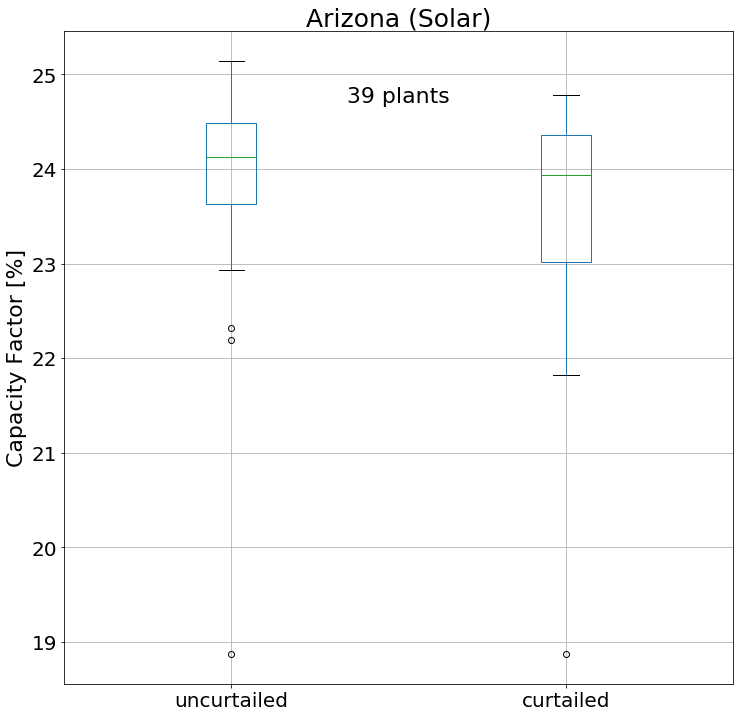

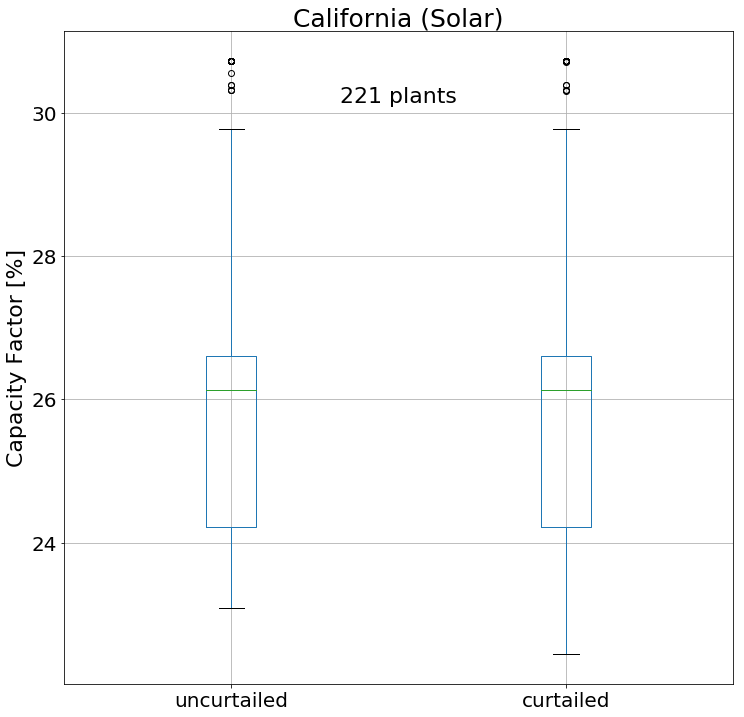

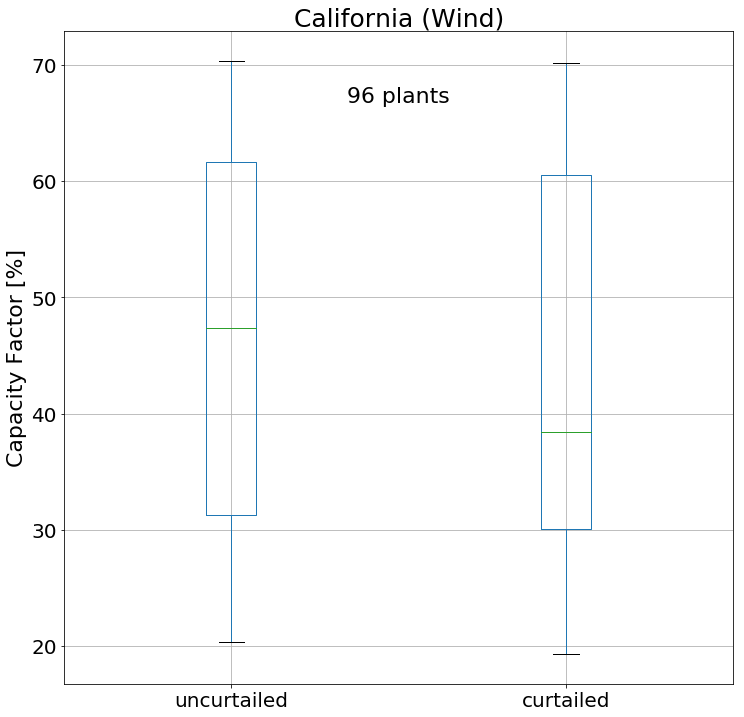

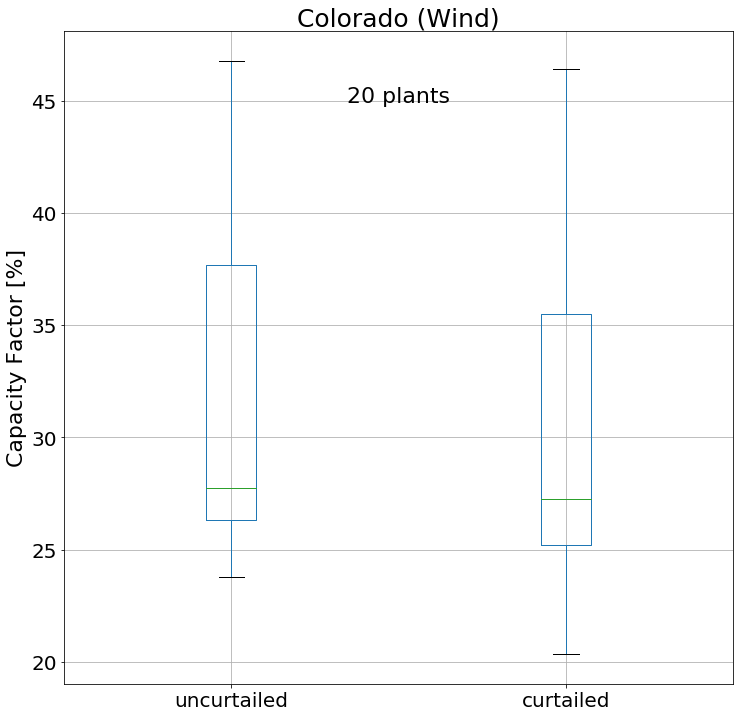

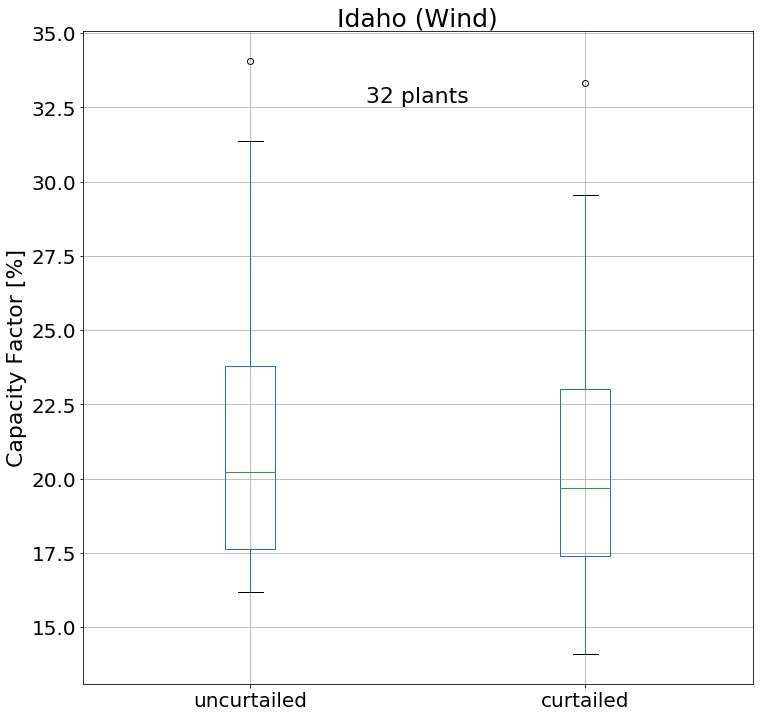

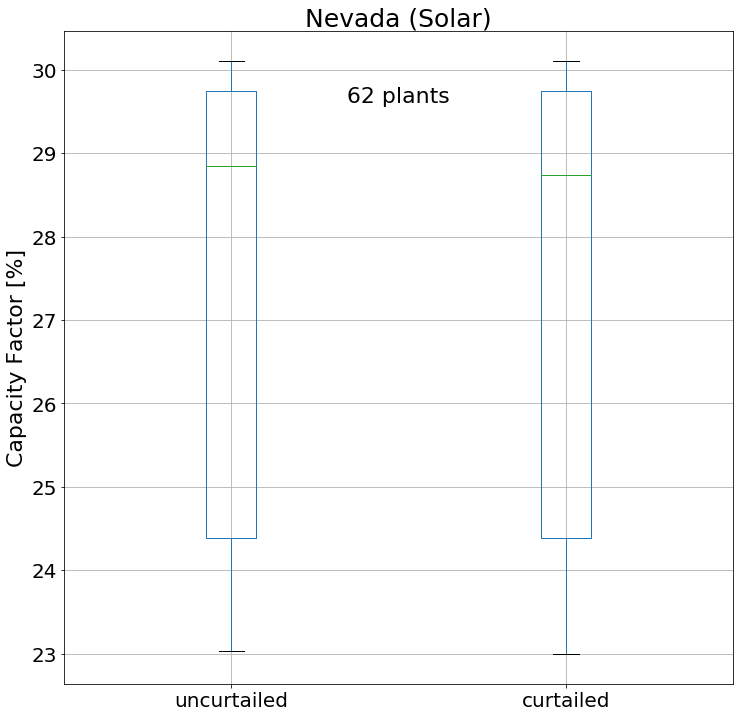

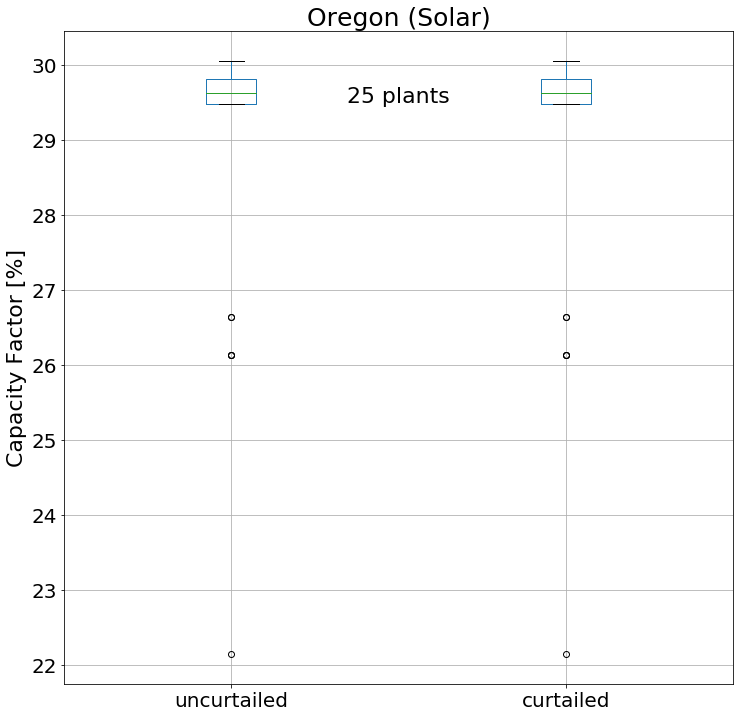

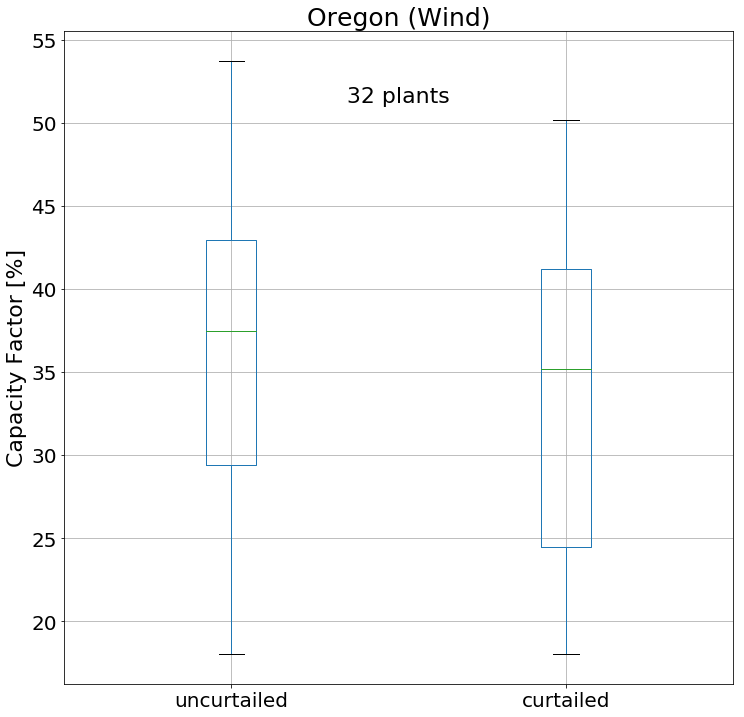

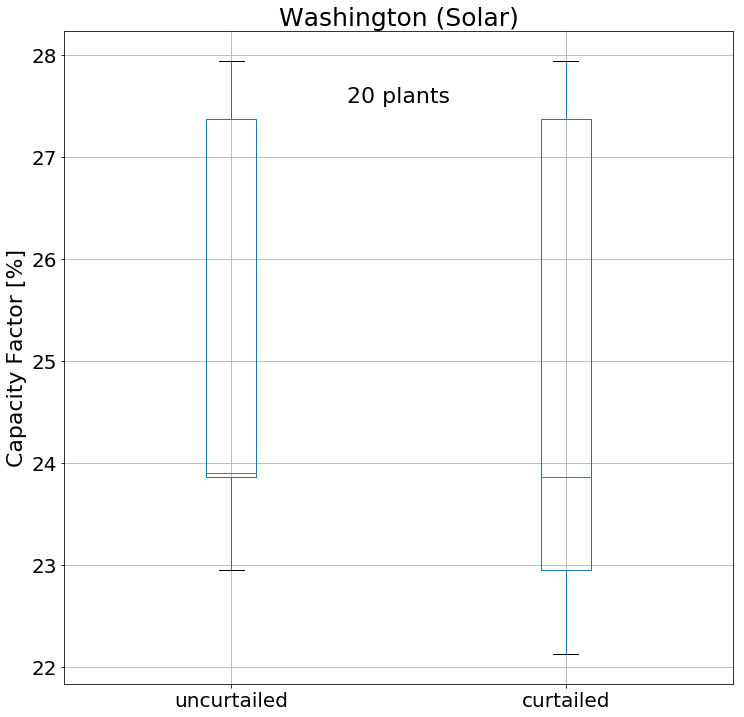

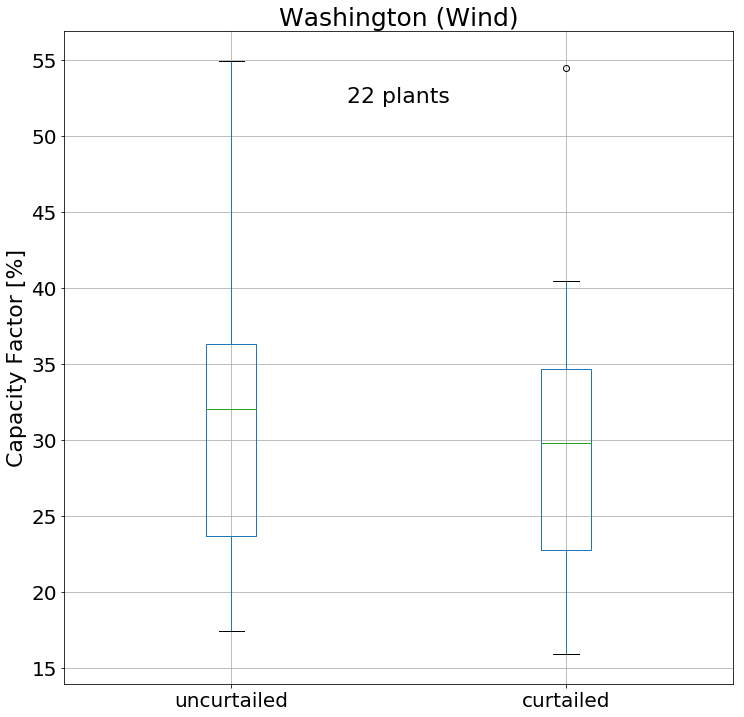

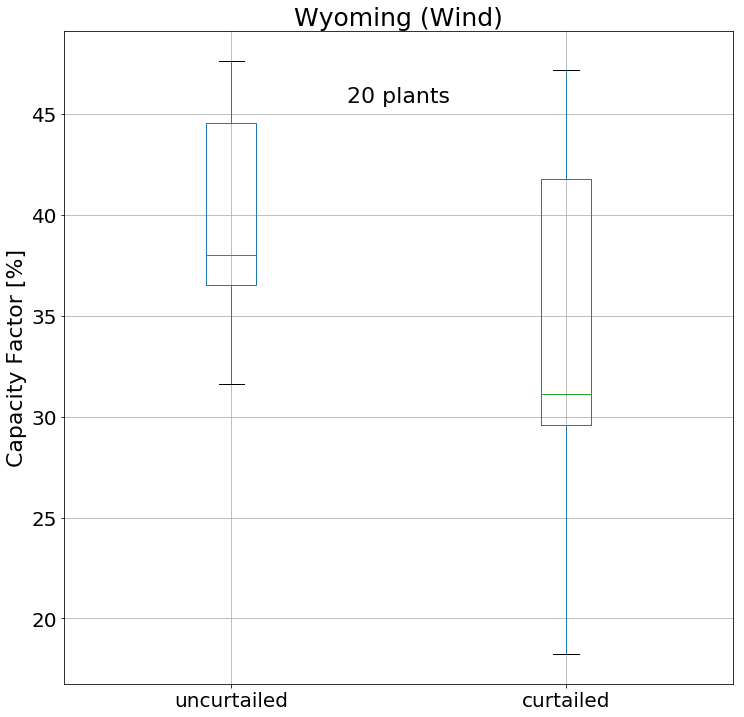

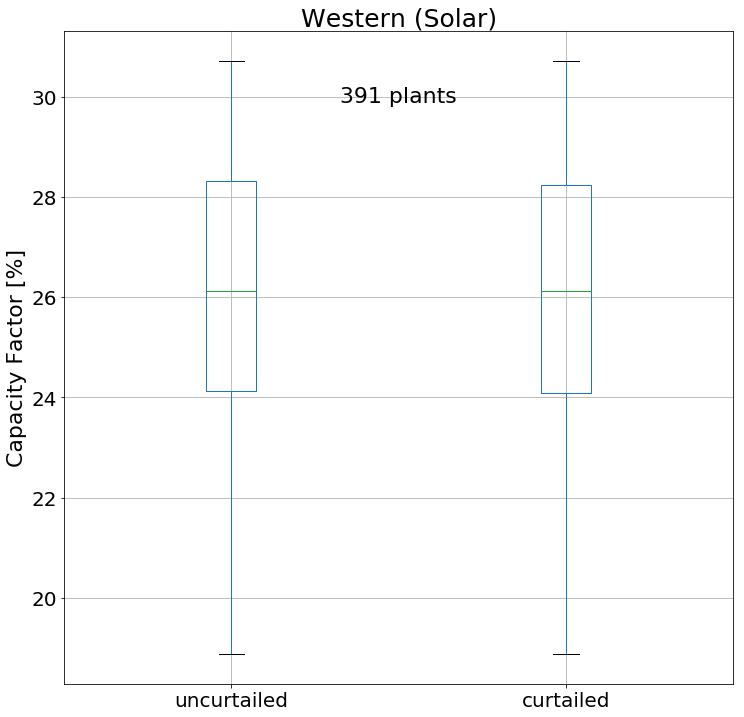

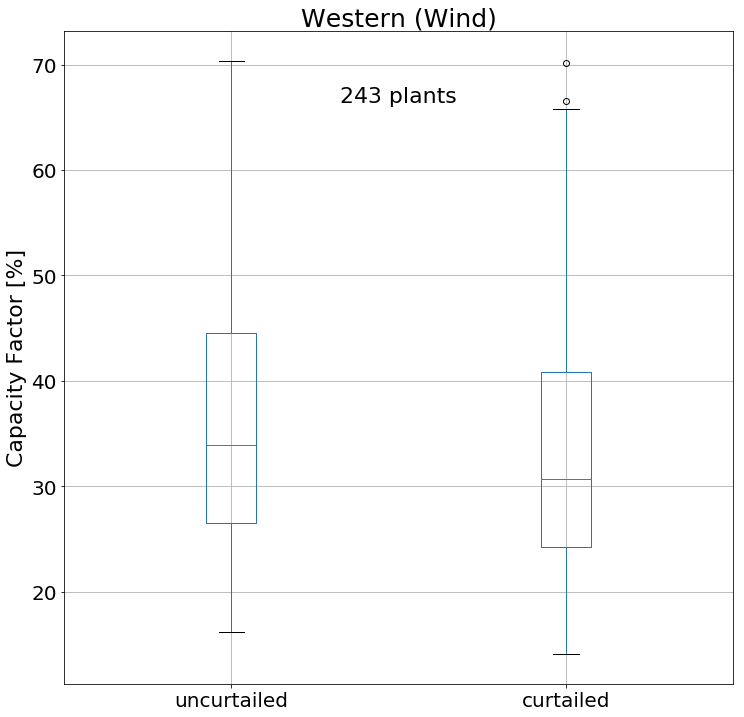

----------------------------------------
Capacity factor in Arizona: 
solar: 0.239 (pre-simulation) / 0.236 (post-simulation)
wind: 0.238 (pre-simulation) / 0.228 (post-simulation)
----------------------------------------
Capacity factor in California: 
solar: 0.261 (pre-simulation) / 0.261 (post-simulation)
wind: 0.470 (pre-simulation) / 0.439 (post-simulation)
----------------------------------------
Capacity factor in Colorado: 
solar: 0.241 (pre-simulation) / 0.241 (post-simulation)
wind: 0.319 (pre-simulation) / 0.303 (post-simulation)
----------------------------------------
Capacity factor in Idaho: 
solar: 0.279 (pre-simulation) / 0.279 (post-simulation)
wind: 0.217 (pre-simulation) / 0.207 (post-simulation)
----------------------------------------
Capacity factor in Montana: 
wind: 0.240 (pre-simulation) / 0.215 (post-simulation)
----------------------------------------
Capacity factor in Nevada: 
solar: 0.275 (pre-simulation) / 0.275 (post-simulation)
wind: 0.250 (pre-simulat

In [11]:
time = ('2016-07-21-00', '2016-07-31-23', 'utc', 'H')
data = prepare_data(scenario)
zones = ['Arizona', 'California', 'Colorado', 'Idaho', 'Montana', 'Nevada',
         'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming', 'Western']
do_yield_analysis(data, time, zones)

## Fall

Load solar data
Load wind data
Load demand data
No solar plants in Montana
No solar plants in Wyoming


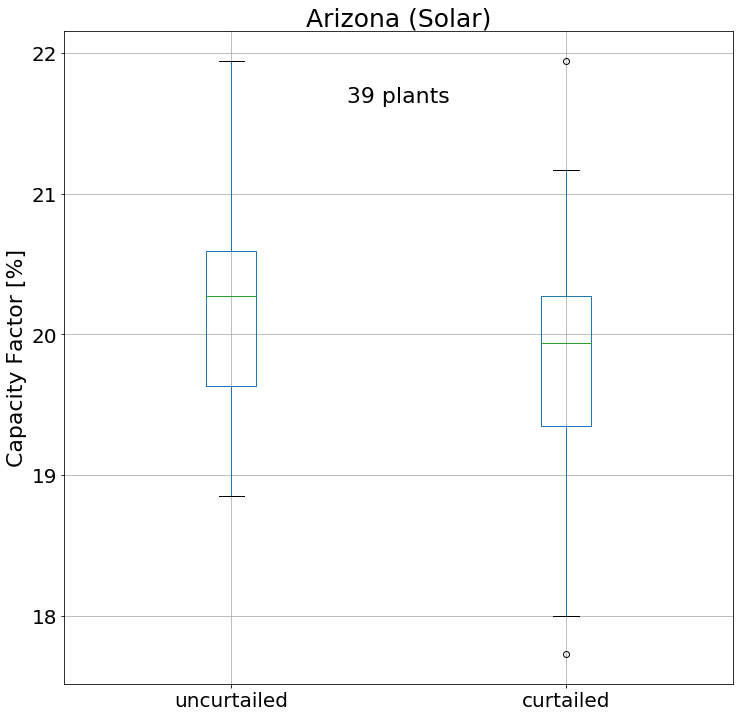

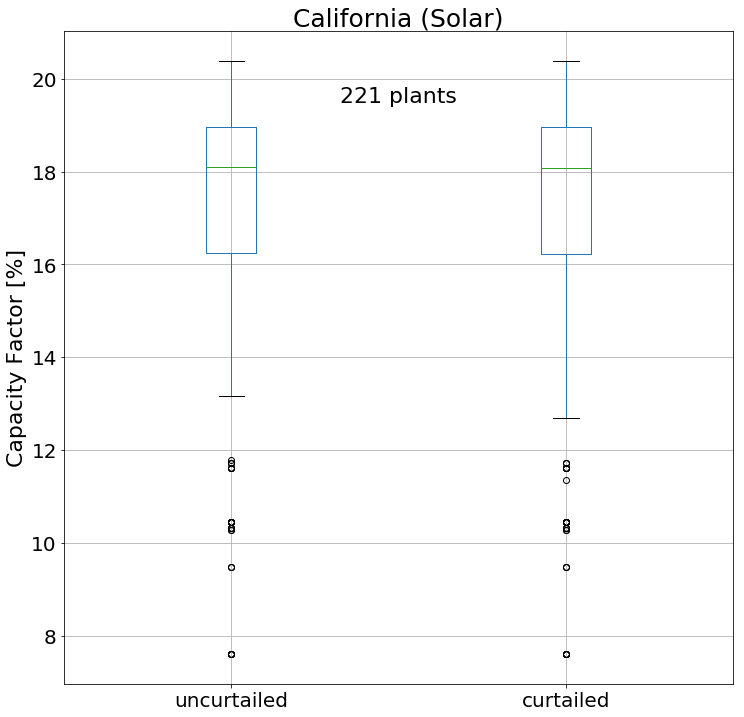

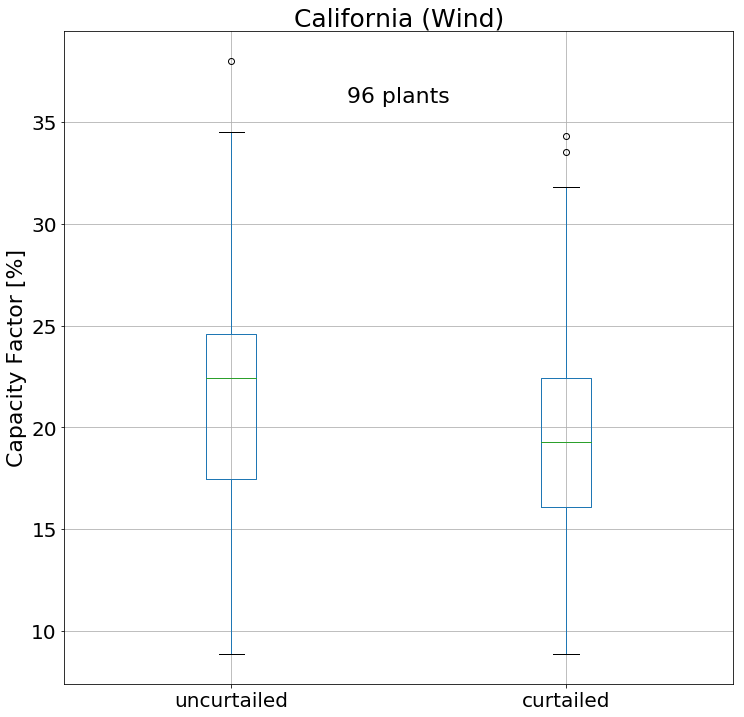

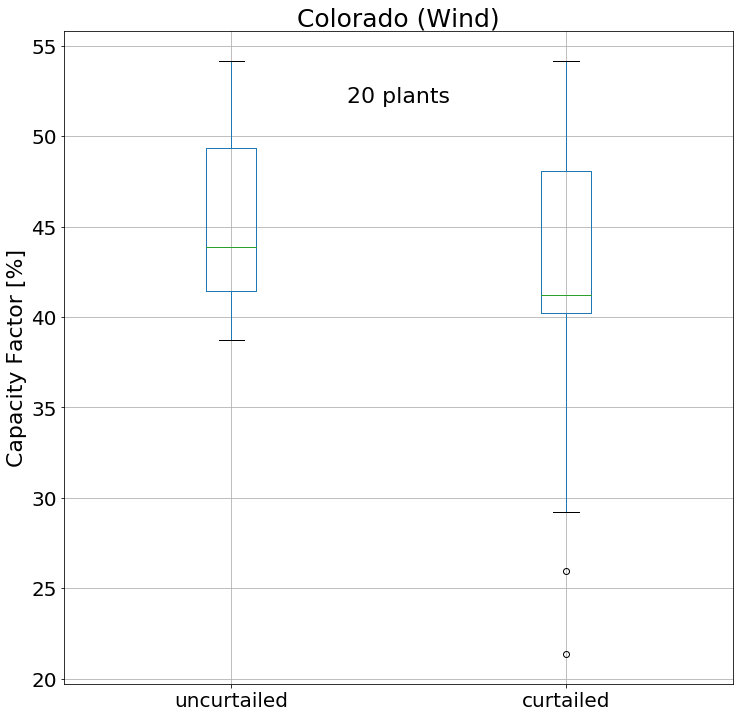

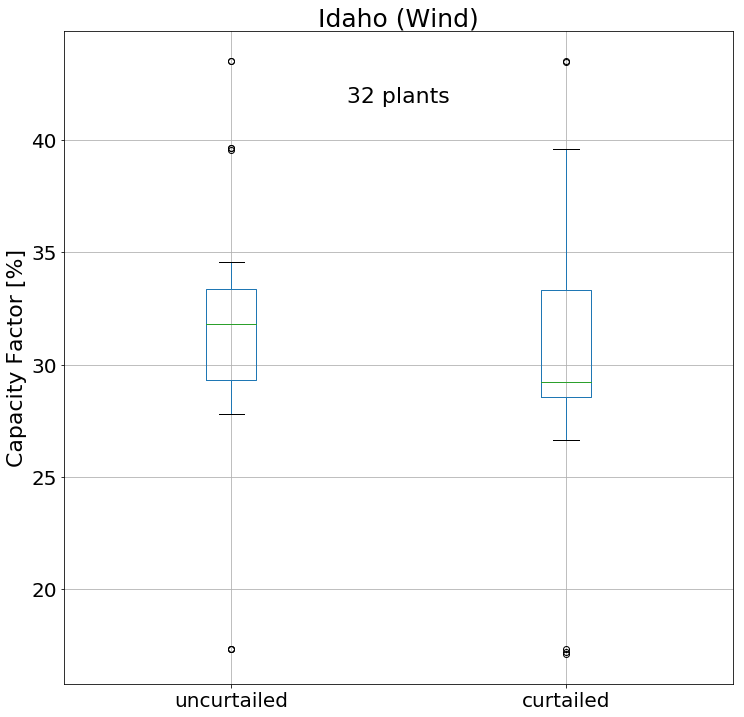

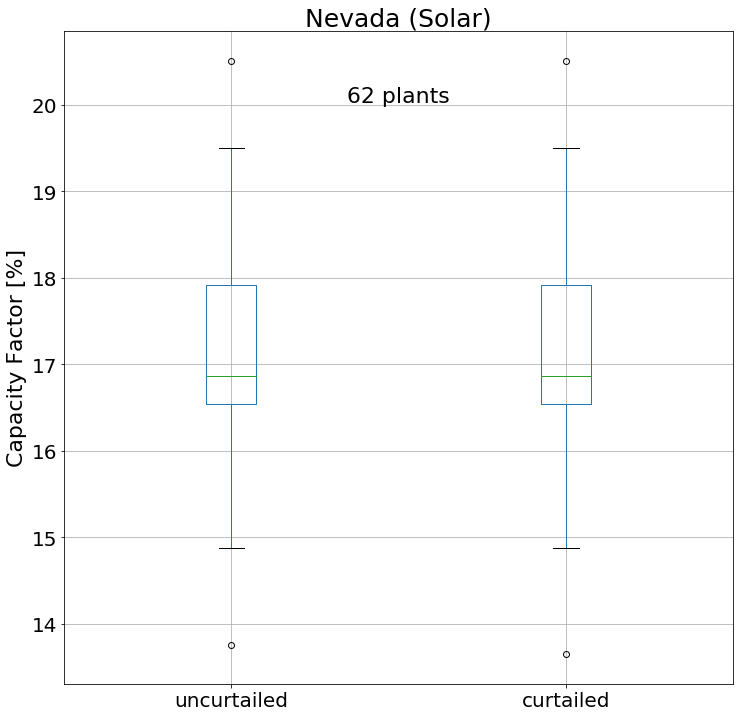

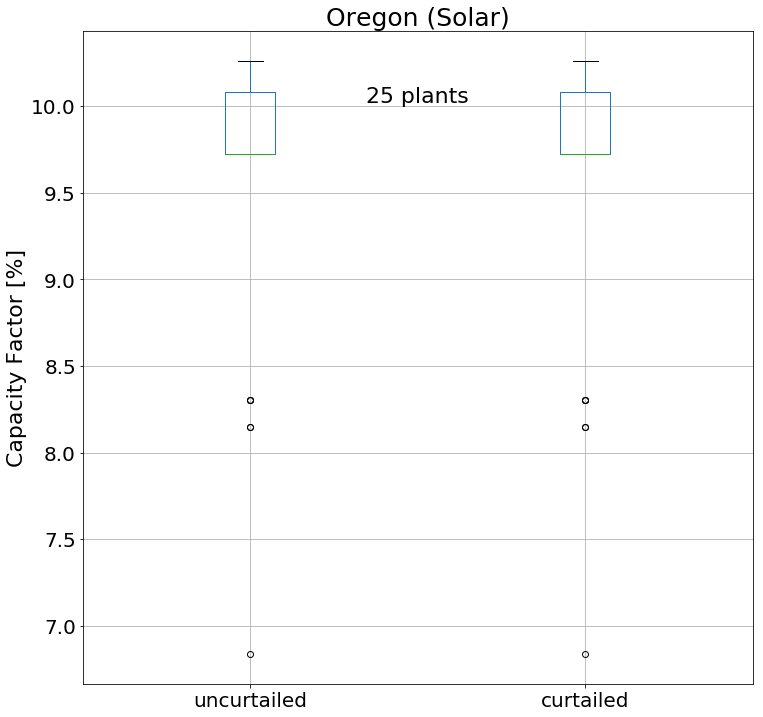

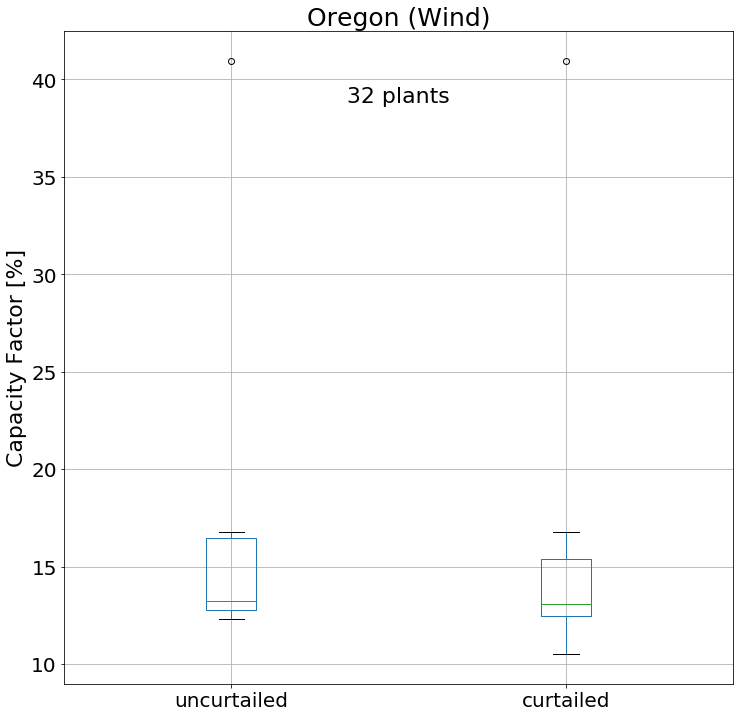

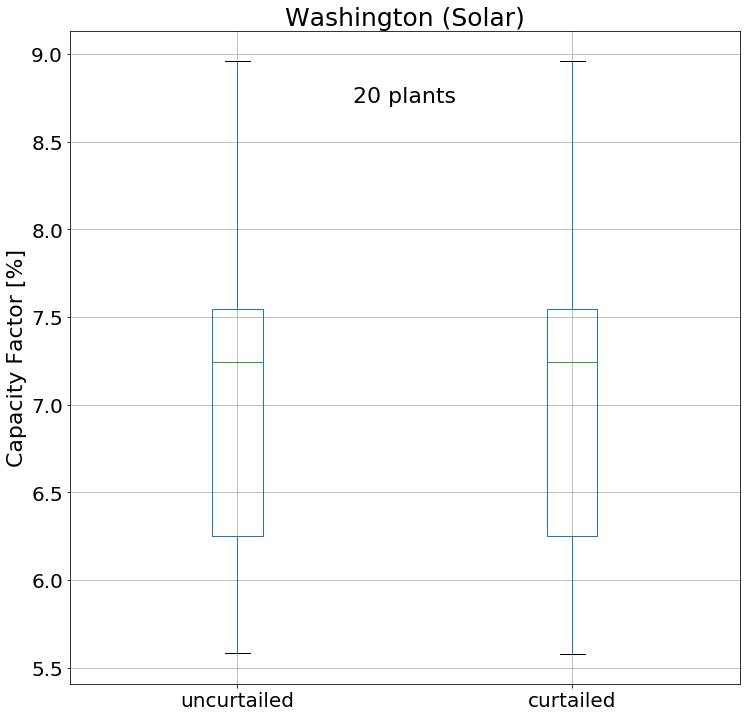

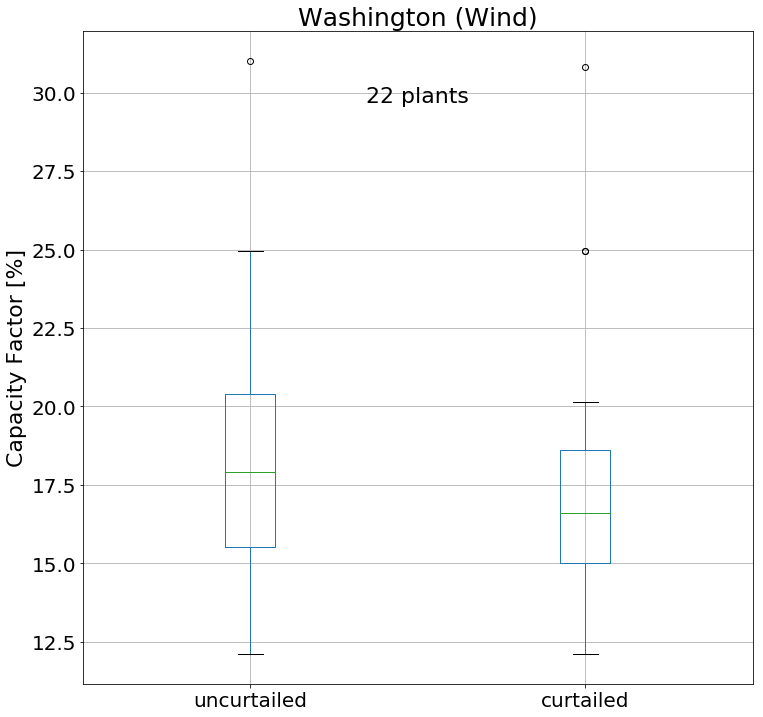

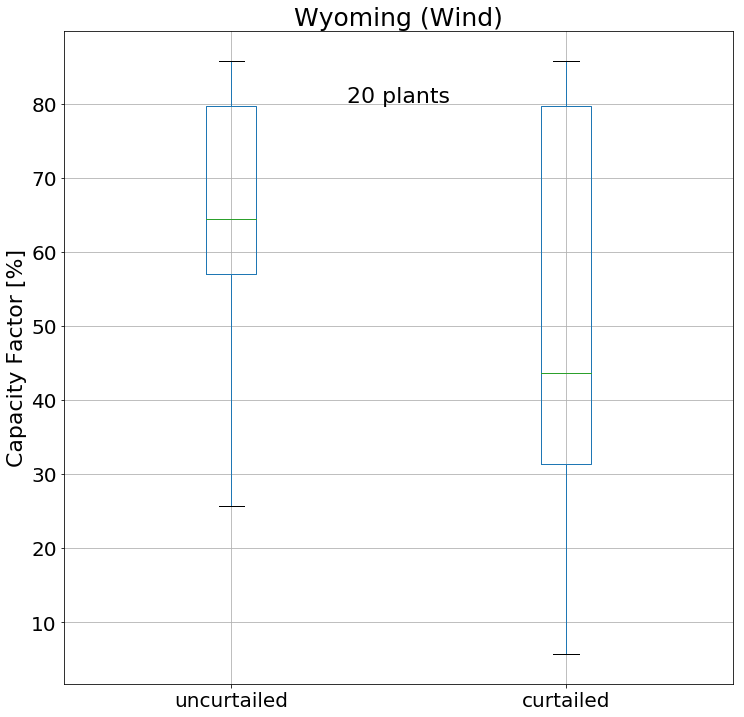

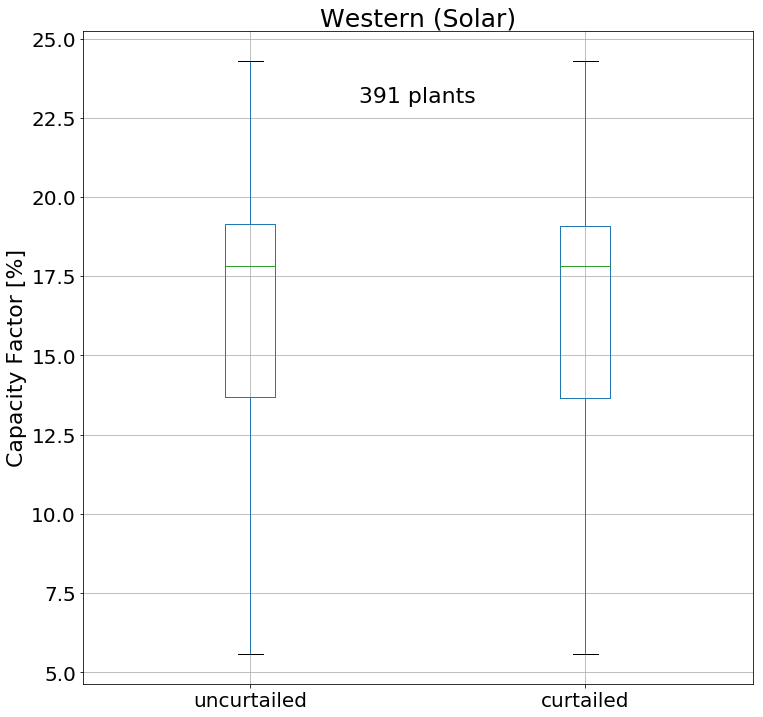

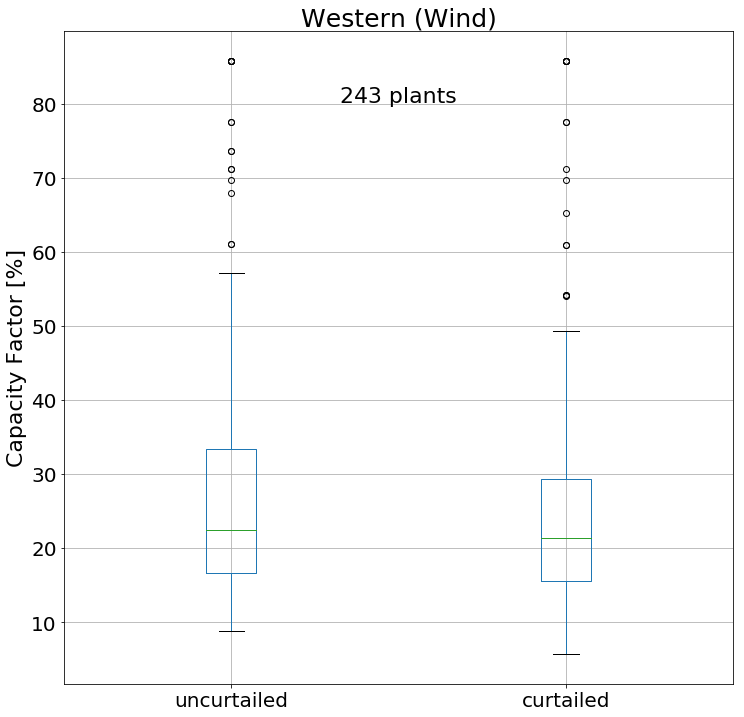

----------------------------------------
Capacity factor in Arizona: 
solar: 0.201 (pre-simulation) / 0.198 (post-simulation)
wind: 0.322 (pre-simulation) / 0.322 (post-simulation)
----------------------------------------
Capacity factor in California: 
solar: 0.168 (pre-simulation) / 0.168 (post-simulation)
wind: 0.200 (pre-simulation) / 0.195 (post-simulation)
----------------------------------------
Capacity factor in Colorado: 
solar: 0.229 (pre-simulation) / 0.229 (post-simulation)
wind: 0.455 (pre-simulation) / 0.415 (post-simulation)
----------------------------------------
Capacity factor in Idaho: 
solar: 0.092 (pre-simulation) / 0.092 (post-simulation)
wind: 0.314 (pre-simulation) / 0.305 (post-simulation)
----------------------------------------
Capacity factor in Montana: 
wind: 0.239 (pre-simulation) / 0.213 (post-simulation)
----------------------------------------
Capacity factor in Nevada: 
solar: 0.171 (pre-simulation) / 0.170 (post-simulation)
wind: 0.697 (pre-simulat

In [12]:
time = ('2016-10-21-00', '2016-10-31-23', 'utc', 'H')
data = prepare_data(scenario)
zones = ['Arizona', 'California', 'Colorado', 'Idaho', 'Montana', 'Nevada',
         'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming', 'Western']
do_yield_analysis(data, time, zones)